In [223]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from community import community_louvain

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler


In [224]:
# Read in the excel file 'randstad.xlsx' as a dataframe
randstad_network = pd.read_excel('City Network.xlsx')
# Show contents of the dataframe
randstad_network

,weight,0,b
0,40.0,Amsterdam,Utrecht
1,28.7,Leiden,Schiphol
2,22.9,Den Haag,Leiden
3,17.4,Woerden,Gouda
4,19.9,Utrecht,Woerden
5,24.1,Woerden,Alphen aan de rijn
6,7.5,Den Haag,Delft
7,19.9,Zaandam,Amsterdam
8,25.5,Zaandam,Haarlem
9,21.5,Haarlem,Schiphol


In [225]:
# Make a graph from the dataframe
Randstad_Graph=nx.from_pandas_edgelist(randstad_network, 0, 'b', ['weight'])

In [226]:
print(nx.nodes(Randstad_Graph))

['Amsterdam', 'Utrecht', 'Leiden', 'Schiphol', 'Den Haag', 'Woerden', 'Gouda', 'Alphen aan de rijn', 'Delft', 'Zaandam', 'Haarlem', 'Almere', 'Hilversum', 'Zoetermeer', 'Amersfoort', 'Rotterdam', 'Vlaardingen', 'Spijkenisse', 'Dordrecht']


In [227]:
dsp = nx.shortest_path(Randstad_Graph, source='Amsterdam', target='Delft')
print(dsp)

['Amsterdam', 'Schiphol', 'Leiden', 'Den Haag', 'Delft']


In [228]:
dspl = nx.shortest_path_length(Randstad_Graph, source='Amsterdam', target='Delft')
print(dspl)

4


In [229]:
dspl = nx.shortest_path_length(Randstad_Graph, source='Amsterdam', target='Delft',weight='weight')
print(dspl)

78.3


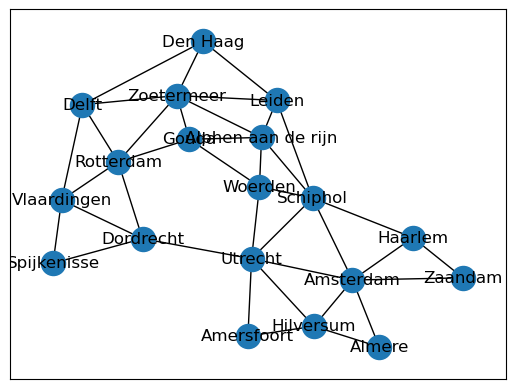

In [230]:
# Plot the graph
nx.draw_networkx(Randstad_Graph)

In [231]:
#Calculate the betweenness centrality, don't normalize
betweenness = nx.betweenness_centrality(Randstad_Graph,k=None,normalized=False)
betweenness

{'Amsterdam': 28.974999999999998,
 'Utrecht': 49.82142857142857,
 'Leiden': 15.07142857142857,
 'Schiphol': 38.29285714285714,
 'Den Haag': 2.2928571428571427,
 'Woerden': 9.195238095238095,
 'Gouda': 5.5619047619047635,
 'Alphen aan de rijn': 10.038095238095238,
 'Delft': 5.542857142857142,
 'Zaandam': 0.0,
 'Haarlem': 3.6083333333333334,
 'Almere': 0.0,
 'Hilversum': 5.7023809523809526,
 'Zoetermeer': 13.864285714285712,
 'Amersfoort': 0.0,
 'Rotterdam': 13.291666666666664,
 'Vlaardingen': 7.639285714285713,
 'Spijkenisse': 0.0,
 'Dordrecht': 31.10238095238095}

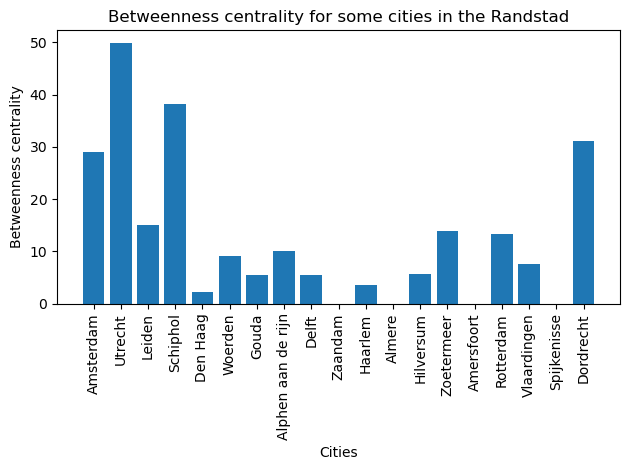

In [232]:
# Plot the values in a bar chart
plt.bar(range(len(betweenness)), betweenness.values(), align='center')
plt.xticks(range(len(betweenness)), list(betweenness.keys()))
plt.title("Betweenness centrality for some cities in the Randstad")
plt.xlabel("Cities")
plt.ylabel("Betweenness centrality")
plt.xticks(rotation=90)
plt.tight_layout()

In [233]:
#Calculate the weighted edge betweenness centrality, normalize
edge_betweenness_weigthed = nx.edge_betweenness_centrality(Randstad_Graph, 
                                                             k=None, 
                                                             normalized=True, 
                                                             weight='weight', 
                                                             seed=None)
edge_betweenness_weigthed

{('Amsterdam', 'Utrecht'): 0.029239766081871343,
 ('Amsterdam', 'Zaandam'): 0.09941520467836257,
 ('Amsterdam', 'Schiphol'): 0.1695906432748538,
 ('Amsterdam', 'Almere'): 0.05263157894736842,
 ('Amsterdam', 'Hilversum'): 0.04093567251461988,
 ('Amsterdam', 'Haarlem'): 0.029239766081871343,
 ('Utrecht', 'Woerden'): 0.2046783625730994,
 ('Utrecht', 'Schiphol'): 0.011695906432748537,
 ('Utrecht', 'Hilversum'): 0.1111111111111111,
 ('Utrecht', 'Amersfoort'): 0.07602339181286549,
 ('Utrecht', 'Dordrecht'): 0.03508771929824561,
 ('Leiden', 'Schiphol'): 0.19883040935672514,
 ('Leiden', 'Den Haag'): 0.07017543859649122,
 ('Leiden', 'Alphen aan de rijn'): 0.03508771929824561,
 ('Leiden', 'Zoetermeer'): 0.14035087719298245,
 ('Schiphol', 'Haarlem'): 0.07017543859649122,
 ('Schiphol', 'Woerden'): 0.023391812865497075,
 ('Schiphol', 'Alphen aan de rijn'): 0.05263157894736842,
 ('Den Haag', 'Delft'): 0.06432748538011696,
 ('Den Haag', 'Zoetermeer'): 0.04093567251461988,
 ('Woerden', 'Gouda'): 0.192

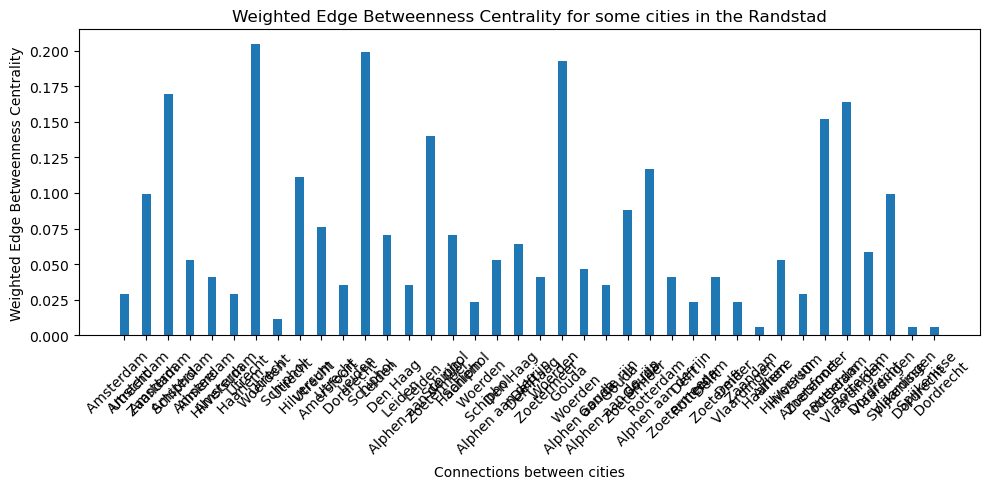

In [234]:
# Helper function for parsing the edge labels
def ppEdges (l):
    rl = []
    for i in range(len(l)):
        rl.append(str(l[i][0]) + ' \n ' + str(l[i][1]))
    return rl

# Plot the values in a bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(len(edge_betweenness_weigthed)), edge_betweenness_weigthed.values(), width=0.4)
plt.xticks(range(len(edge_betweenness_weigthed)), ppEdges(list(edge_betweenness_weigthed.keys())))
plt.title("Weighted Edge Betweenness Centrality for some cities in the Randstad")
plt.xlabel("Connections between cities")
plt.ylabel("Weighted Edge Betweenness Centrality")
plt.xticks(rotation=45)
plt.tight_layout()

In [235]:
# first print all nodes/cities
list(nx.nodes(Randstad_Graph)) 

['Amsterdam',
 'Utrecht',
 'Leiden',
 'Schiphol',
 'Den Haag',
 'Woerden',
 'Gouda',
 'Alphen aan de rijn',
 'Delft',
 'Zaandam',
 'Haarlem',
 'Almere',
 'Hilversum',
 'Zoetermeer',
 'Amersfoort',
 'Rotterdam',
 'Vlaardingen',
 'Spijkenisse',
 'Dordrecht']

In [236]:
#print all edges/connections in the network
list (nx.edges(Randstad_Graph))

[('Amsterdam', 'Utrecht'),
 ('Amsterdam', 'Zaandam'),
 ('Amsterdam', 'Schiphol'),
 ('Amsterdam', 'Almere'),
 ('Amsterdam', 'Hilversum'),
 ('Amsterdam', 'Haarlem'),
 ('Utrecht', 'Woerden'),
 ('Utrecht', 'Schiphol'),
 ('Utrecht', 'Hilversum'),
 ('Utrecht', 'Amersfoort'),
 ('Utrecht', 'Dordrecht'),
 ('Leiden', 'Schiphol'),
 ('Leiden', 'Den Haag'),
 ('Leiden', 'Alphen aan de rijn'),
 ('Leiden', 'Zoetermeer'),
 ('Schiphol', 'Haarlem'),
 ('Schiphol', 'Woerden'),
 ('Schiphol', 'Alphen aan de rijn'),
 ('Den Haag', 'Delft'),
 ('Den Haag', 'Zoetermeer'),
 ('Woerden', 'Gouda'),
 ('Woerden', 'Alphen aan de rijn'),
 ('Gouda', 'Alphen aan de rijn'),
 ('Gouda', 'Zoetermeer'),
 ('Gouda', 'Rotterdam'),
 ('Alphen aan de rijn', 'Zoetermeer'),
 ('Delft', 'Rotterdam'),
 ('Delft', 'Zoetermeer'),
 ('Delft', 'Vlaardingen'),
 ('Zaandam', 'Haarlem'),
 ('Almere', 'Hilversum'),
 ('Hilversum', 'Amersfoort'),
 ('Zoetermeer', 'Rotterdam'),
 ('Rotterdam', 'Vlaardingen'),
 ('Rotterdam', 'Dordrecht'),
 ('Vlaardingen', 

In [237]:
# print all the shortest paths in the network from each city
L = list(nx.all_pairs_dijkstra(Randstad_Graph))

In [238]:
#betweenness centrality (B for betweeness centrality) 
B = nx.betweenness_centrality(Randstad_Graph)

In [239]:
#Degree centrality (D for Degree centrality) 
D = nx.degree_centrality(Randstad_Graph)

In [240]:
#closeness centrality (C for closeness )
C = nx.closeness_centrality(Randstad_Graph)

In [241]:
# create a dataframe to store centrality measures
df = pd.DataFrame({
    'Node': list(Randstad_Graph.nodes),
    'Betweenness Centrality': [B[node] for node in Randstad_Graph.nodes],
    'Degree Centrality': [D[node] for node in Randstad_Graph.nodes],
    'Closeness Centrality': [C[node] for node in Randstad_Graph.nodes]
})


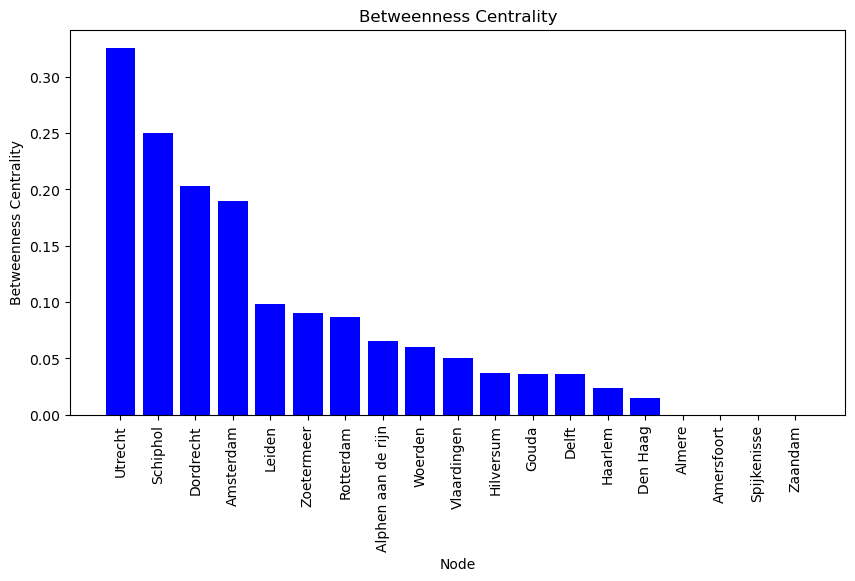

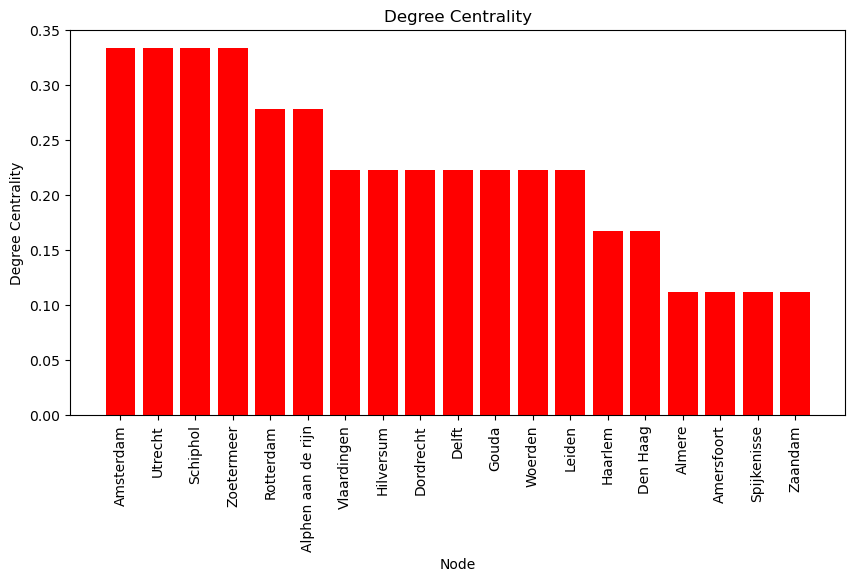

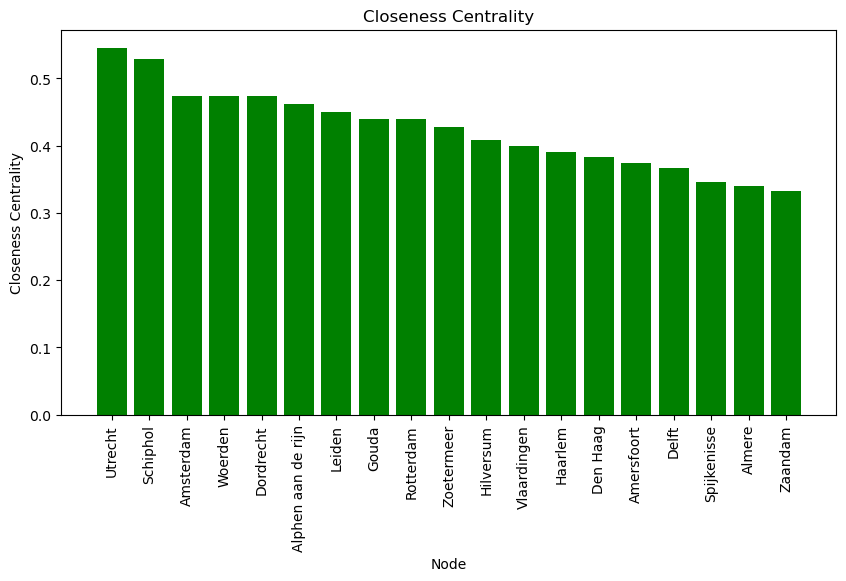

In [242]:
#plot 3 graphs to visualize the results in the dataframe and see which cities are most significant 
# change the data frame so it is sorted, then plot betweenness centrality in a sorted way 
df_sorted_betweenness = df.sort_values(by='Betweenness Centrality', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(df_sorted_betweenness['Node'], df_sorted_betweenness['Betweenness Centrality'], color='blue')
plt.title('Betweenness Centrality')
plt.xlabel('Node')
plt.ylabel('Betweenness Centrality')
plt.xticks(rotation=90)
plt.show()

# change the data frame so it is sorted, then plot degree centrality
df_sorted_degree = df.sort_values(by='Degree Centrality', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(df_sorted_degree['Node'], df_sorted_degree['Degree Centrality'], color='red')
plt.title('Degree Centrality')
plt.xlabel('Node')
plt.ylabel('Degree Centrality')
plt.xticks(rotation=90)
plt.show()

# change the data frame so it is sorted, then plot closeness centrality
df_sorted_closeness = df.sort_values(by='Closeness Centrality', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(df_sorted_closeness['Node'], df_sorted_closeness['Closeness Centrality'], color='green')
plt.title('Closeness Centrality')
plt.xlabel('Node')
plt.ylabel('Closeness Centrality')
plt.xticks(rotation=90)
plt.show()

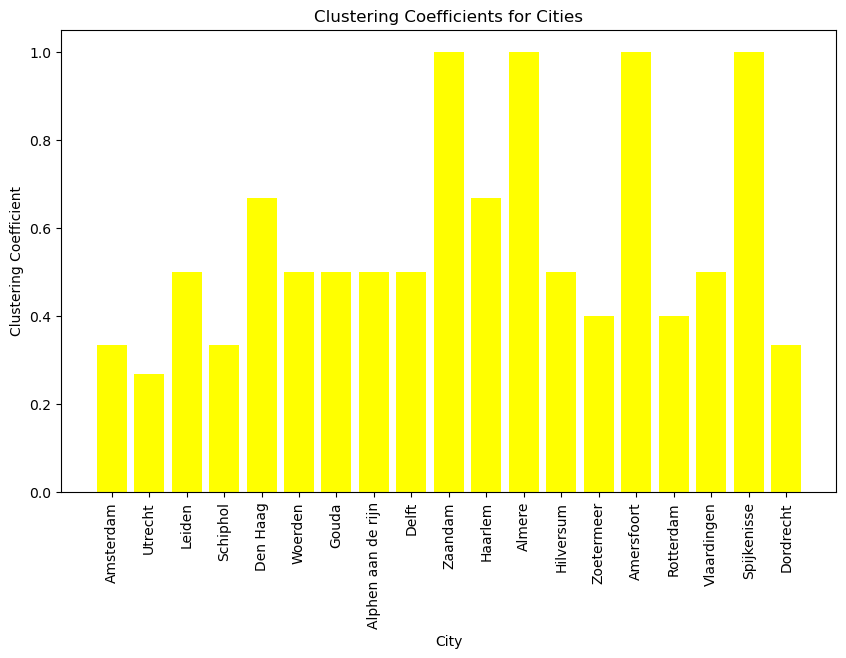

In [243]:
#Calculate clustering coefficients
clustering_coefficients = nx.clustering(Randstad_Graph)

# Plot clustering coefficients
plt.figure(figsize=(10, 6))
plt.bar(clustering_coefficients.keys(), clustering_coefficients.values(), color='yellow')
plt.title('Clustering Coefficients for Cities')
plt.xlabel('City')
plt.ylabel('Clustering Coefficient')
plt.xticks(rotation=90)
plt.show()

More information about Graph operations can be found in the NetworkX documentation:
https://networkx.github.io/documentation/stable/index.html

For example, this is the documentation on calculating the edge betweenness centrality:
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality

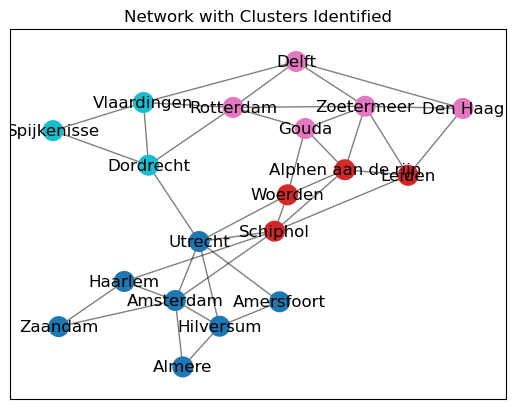

In [244]:
partition = community_louvain.best_partition(Randstad_Graph)

pos = nx.spring_layout(Randstad_Graph)  # Positions for all nodes

# Draw nodes and edges
nx.draw_networkx_nodes(Randstad_Graph, pos, node_size=200, cmap=plt.get_cmap('tab10'), node_color=list(partition.values()))
nx.draw_networkx_edges(Randstad_Graph, pos, alpha=0.5)

# Draw node labels
nx.draw_networkx_labels(Randstad_Graph, pos)

plt.title("Network with Clusters Identified")
plt.show()


In [245]:
#to normalize the data we need to define the populations of each city
populations = {
    'Amsterdam': 1056,
    'Haarlem': 190,
    'Schiphol': 187,
    'Leiden': 146,
    'Den Haag': 647,
    'Zoetermeer': 146,
    'Delft': 122,
    'Rotterdam': 763,
    'Spijkenisse': 83,
    'Dordrecht': 140,
    'Vlaardingen': 86,
    'Alphen aan de rijn': 131,
    'Gouda': 87,
    'Woerden': 61,
    'Utrecht': 423,
    'Hilversum': 107,
    'Almere': 256,
    'Amersfoort': 185,
    'Zaandam': 184
}

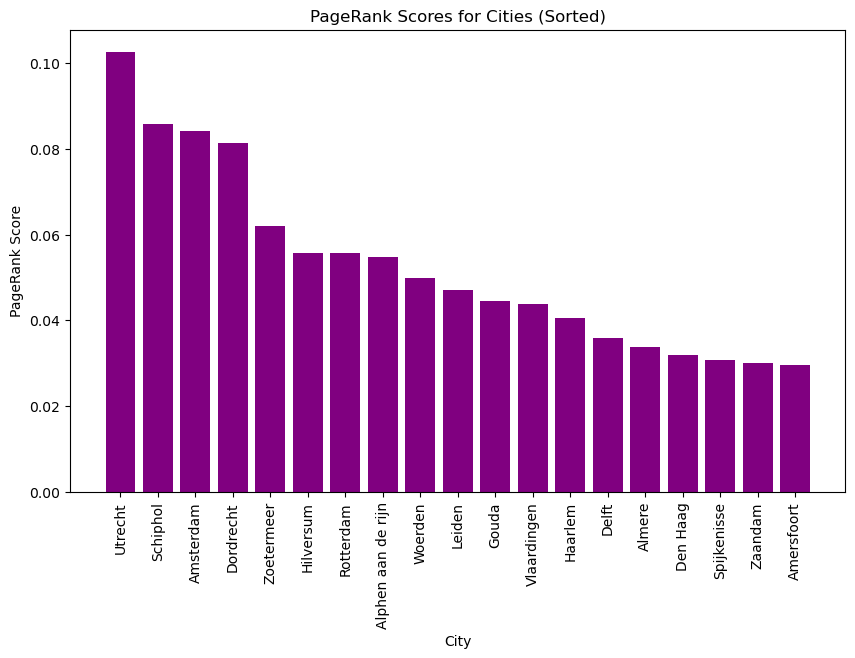

In [246]:
#calculate and plot the page ranks of the cities, to see their relative importance 
page_rank = nx.pagerank(Randstad_Graph)

# Sort PageRank scores by value in descending order
sorted_page_rank = dict(sorted(page_rank.items(), key=lambda item: item[1], reverse=True))

# Plot sorted PageRank scores
plt.figure(figsize=(10, 6))
plt.bar(sorted_page_rank.keys(), sorted_page_rank.values(), color='purple')
plt.title('PageRank Scores for Cities (Sorted)')
plt.xlabel('City')
plt.ylabel('PageRank Score')
plt.xticks(rotation=90)
plt.show()

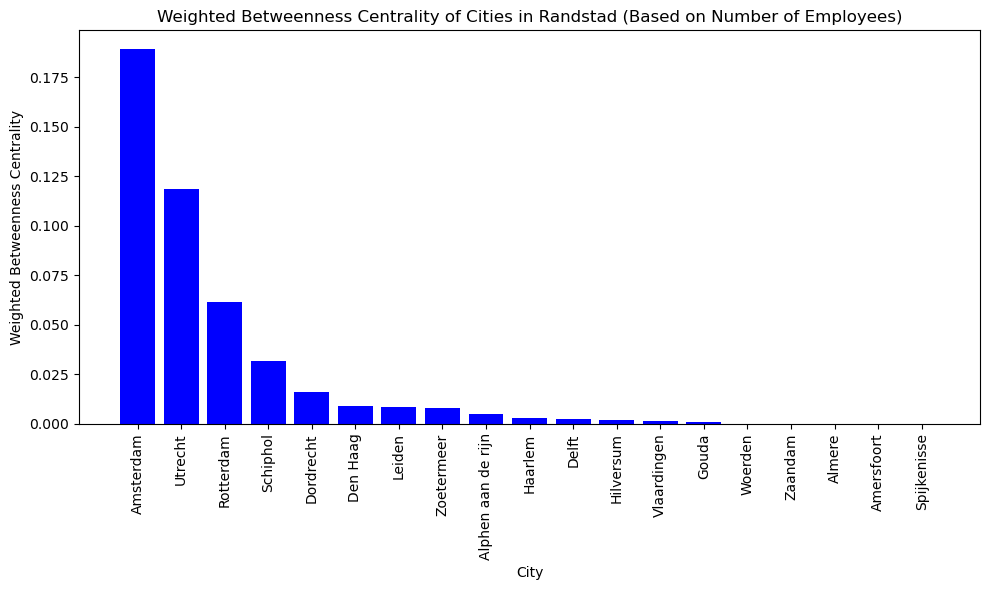

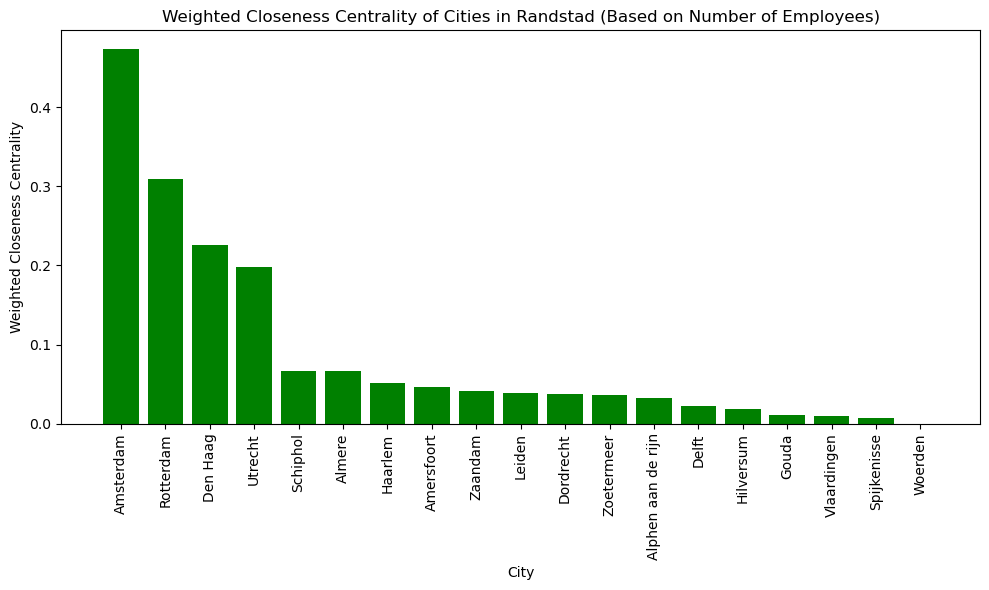

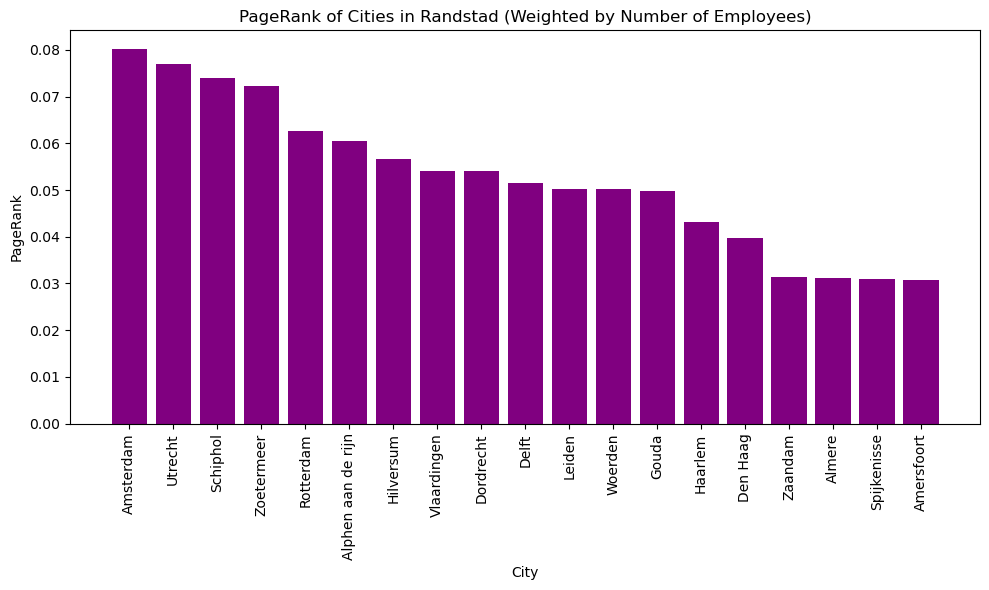

In [247]:
#In this section the betweeness,closeness and page rank metrics will be calculated but scaled with the population of each city aswell
#scale the population between 0 and 1 to add weights of population to the graph
scaler = MinMaxScaler()
scaled_populations = scaler.fit_transform([[pop] for pop in populations.values()]).flatten()

# attach weights to each node
for city, scaled_pop in zip(populations.keys(), scaled_populations):
    Randstad_Graph.nodes[city]['employee_weight_factor'] = scaled_pop


B_weighted = {city: nx.betweenness_centrality(Randstad_Graph)[city] * Randstad_Graph.nodes[city]['employee_weight_factor'] for city in Randstad_Graph.nodes()}
C_weighted = {city: nx.closeness_centrality(Randstad_Graph)[city] * Randstad_Graph.nodes[city]['employee_weight_factor'] for city in Randstad_Graph.nodes()}
pagerank = nx.pagerank(Randstad_Graph, weight='employee_weight_factor')

B_sorted = dict(sorted(B_weighted.items(), key=lambda item: item[1], reverse=True))
C_sorted = dict(sorted(C_weighted.items(), key=lambda item: item[1], reverse=True))
pagerank_sorted = dict(sorted(pagerank.items(), key=lambda item: item[1], reverse=True))

# Weighted Betweenness Centrality
plt.figure(figsize=(10, 6))
plt.bar(B_sorted.keys(), B_sorted.values(), color='blue')
plt.xlabel('City')
plt.ylabel('Weighted Betweenness Centrality')
plt.title('Weighted Betweenness Centrality of Cities in Randstad (Based on Number of Employees)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Weighted Closeness Centrality
plt.figure(figsize=(10, 6))
plt.bar(C_sorted.keys(), C_sorted.values(), color='green')
plt.xlabel('City')
plt.ylabel('Weighted Closeness Centrality')
plt.title('Weighted Closeness Centrality of Cities in Randstad (Based on Number of Employees)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Weighted PageRank
plt.figure(figsize=(10, 6))
plt.bar(pagerank_sorted.keys(), pagerank_sorted.values(), color='purple')
plt.xlabel('City')
plt.ylabel('PageRank')
plt.title('PageRank of Cities in Randstad (Weighted by Number of Employees)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Partition 1: ['Leiden', 'Schiphol', 'Den Haag', 'Gouda', 'Alphen aan de rijn', 'Delft', 'Zoetermeer', 'Rotterdam', 'Vlaardingen']
Partition 2: ['Amsterdam', 'Utrecht', 'Woerden', 'Zaandam', 'Haarlem', 'Almere', 'Hilversum', 'Amersfoort', 'Spijkenisse', 'Dordrecht']


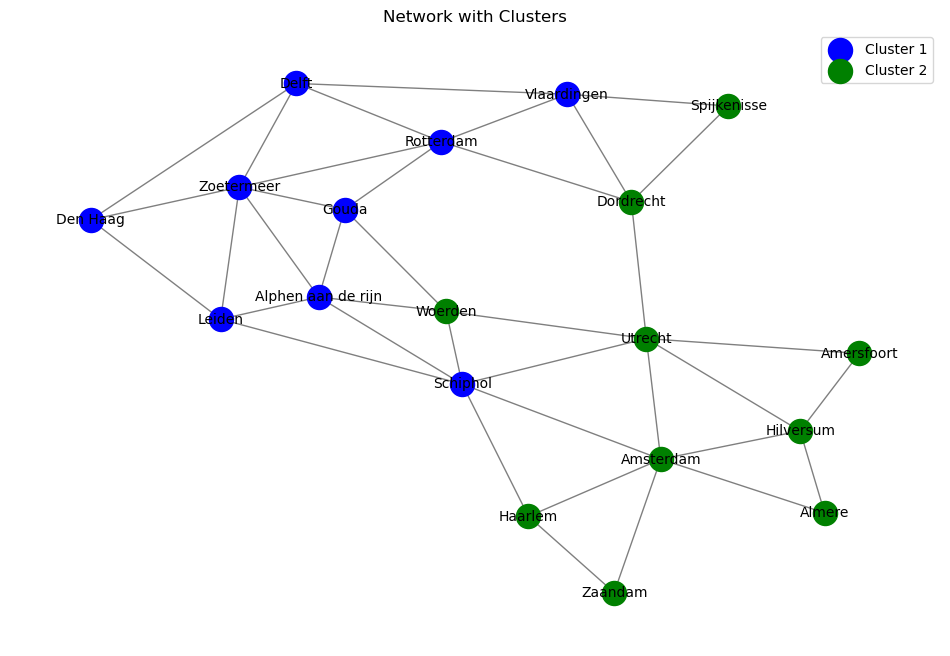

In [248]:
# now we partition the graph into 2 areas based on population and proximity using code
# scale distances 
distances = StandardScaler().fit_transform(nx.linalg.graphmatrix.adjacency_matrix(Randstad_Graph).toarray())

# scale populations
scaled_population_array = StandardScaler().fit_transform(np.array([populations[node] for node in Randstad_Graph.nodes()]).reshape(-1, 1))

# create one matrix wiht both
combined_features = np.concatenate((scaled_population_array, distances), axis=1)

# set clusters to 2
n_clusters = 2 
labels = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42).fit_predict(combined_features)

partition_1 = [node for node, label in zip(Randstad_Graph.nodes(), labels) if label == 0]
partition_2 = [node for node, label in zip(Randstad_Graph.nodes(), labels) if label == 1]

print("Partition 1:", partition_1)
print("Partition 2:", partition_2)

# draw clusters
pos = nx.spring_layout(Randstad_Graph) 
plt.figure(figsize=(12, 8))

nx.draw_networkx_nodes(Randstad_Graph, pos, nodelist=partition_1, node_color='blue', node_size=300, label='Cluster 1')
nx.draw_networkx_nodes(Randstad_Graph, pos, nodelist=partition_2, node_color='green', node_size=300, label='Cluster 2')
nx.draw_networkx_edges(Randstad_Graph, pos, alpha=0.5)
nx.draw_networkx_labels(Randstad_Graph, pos, font_size=10)

plt.title('Network with Clusters')
plt.legend()
plt.axis('off')
plt.show() 


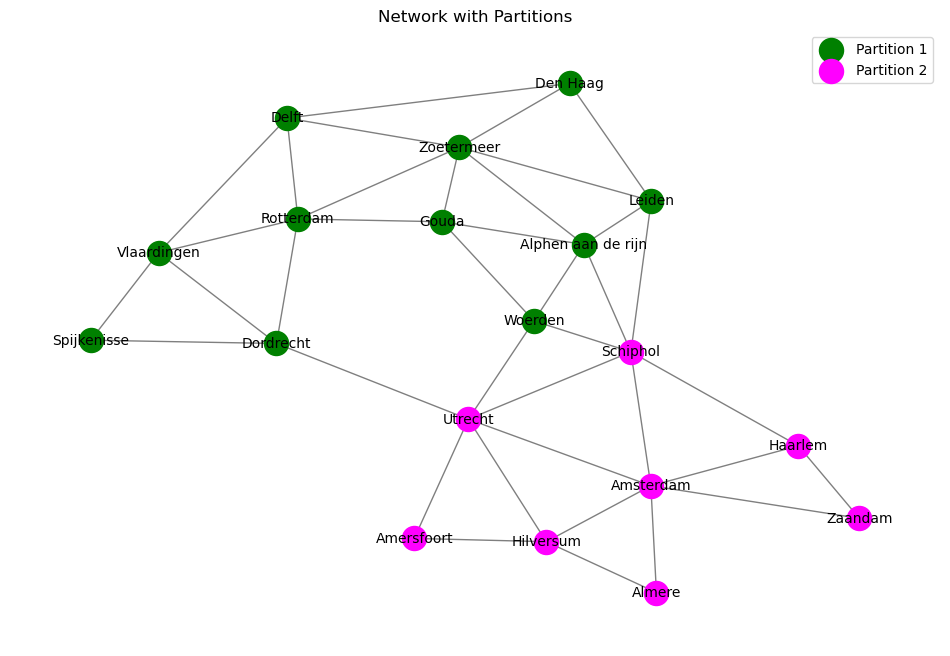

In [249]:
# Manually adjust partitions
partition_1 = [ 'Leiden', 'Den Haag', 'Zoetermeer', 'Delft', 'Rotterdam', 'Spijkenisse', 'Dordrecht' , 'Vlaardingen', 'Alphen aan de rijn', 'Gouda', 'Woerden',]
partition_2 = [ 'Amsterdam', 'Haarlem', 'Schiphol', 'Utrecht', 'Hilversum', 'Almere', 'Amersfoort', 'Zaandam']

pos = nx.spring_layout(Randstad_Graph)
plt.figure(figsize=(12, 8))

nx.draw_networkx_nodes(Randstad_Graph, pos, nodelist=partition_1, node_color='green', node_size=300, label='Partition 1')
nx.draw_networkx_nodes(Randstad_Graph, pos, nodelist=partition_2, node_color='magenta', node_size=300, label='Partition 2')
nx.draw_networkx_edges(Randstad_Graph, pos, alpha=0.5)
nx.draw_networkx_labels(Randstad_Graph, pos, font_size=10)

# Add title and legend
plt.title('Network with Partitions')
plt.legend()
plt.axis('off')

# Show plot
plt.show()


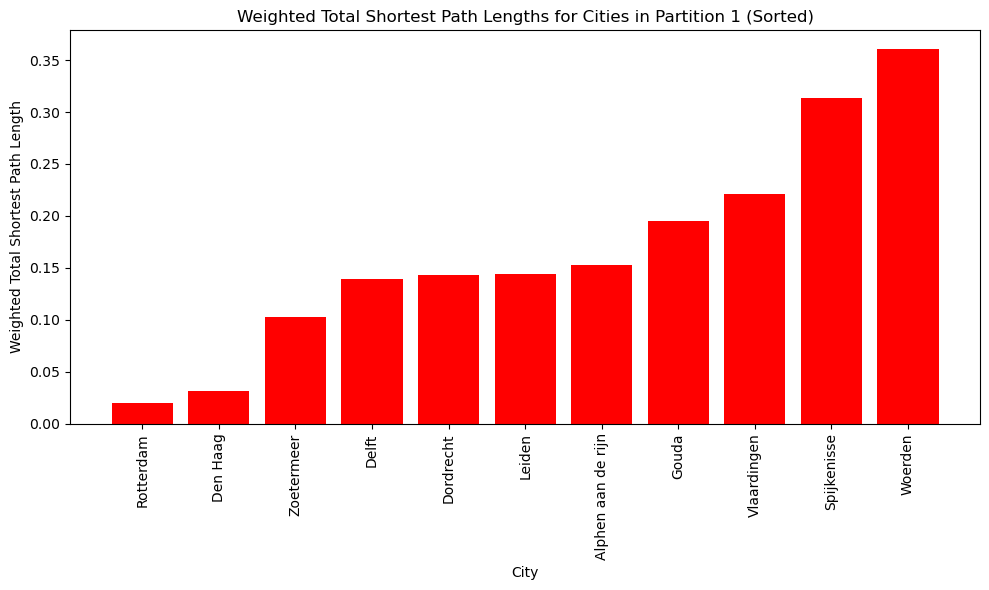

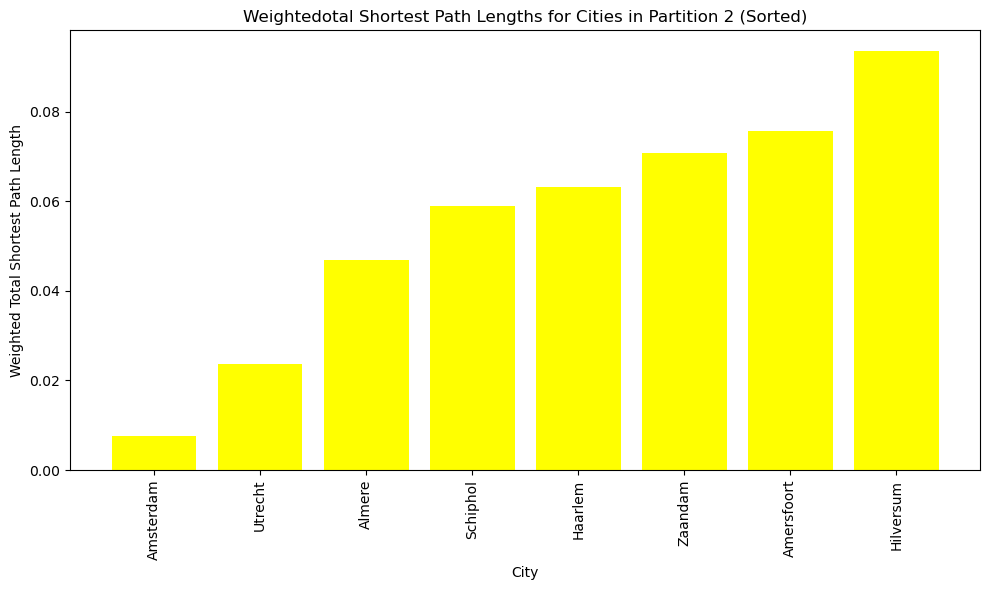

In [250]:
# calculate the best cities in each cluster so there is always the shortest path

def calculate_weighted_total_shortest_path_lengths(graph, partition, populations):
    weighted_total_shortest_path_lengths = {}
    for city in partition:
        total_shortest_path_length = sum(nx.shortest_path_length(graph, city, target) for target in partition if target != city)
        weighted_total_shortest_path_lengths[city] = total_shortest_path_length / populations[city]  
    return weighted_total_shortest_path_lengths

# Calculate weighted total shortest path lengths for each city in partition_1 and partition_2
weighted_total_shortest_path_lengths_partition_1 = calculate_weighted_total_shortest_path_lengths(Randstad_Graph, partition_1, populations)
weighted_total_shortest_path_lengths_partition_2 = calculate_weighted_total_shortest_path_lengths(Randstad_Graph, partition_2, populations)

# Sort the weighted total shortest path lengths for partition 1
sorted_partition_1 = dict(sorted(weighted_total_shortest_path_lengths_partition_1.items(), key=lambda item: item[1]))

# Plot the weighted total shortest paths for partition 1
plt.figure(figsize=(10, 6))
plt.bar(sorted_partition_1.keys(), sorted_partition_1.values(), color='red')
plt.xlabel('City')
plt.ylabel('Weighted Total Shortest Path Length')
plt.title('Weighted Total Shortest Path Lengths for Cities in Partition 1 (Sorted)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Sort the weighted total shortest path lengths for partition 2
sorted_partition_2 = dict(sorted(weighted_total_shortest_path_lengths_partition_2.items(), key=lambda item: item[1]))

# Plot the weighted total shortest paths for partition 2
plt.figure(figsize=(10, 6))
plt.bar(sorted_partition_2.keys(), sorted_partition_2.values(), color='yellow')
plt.xlabel('City')
plt.ylabel('Weighted Total Shortest Path Length')
plt.title('Weightedotal Shortest Path Lengths for Cities in Partition 2 (Sorted)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Sorted measures for Partition 1 Betweenness Centrality:
Node: Rotterdam, Measure: 0.3214814814814815
Node: Zoetermeer, Measure: 0.2633333333333333
Node: Gouda, Measure: 0.16074074074074074
Node: Vlaardingen, Measure: 0.14111111111111113
Node: Delft, Measure: 0.12666666666666665
Node: Alphen aan de rijn, Measure: 0.06666666666666667
Node: Dordrecht, Measure: 0.05518518518518519
Node: Den Haag, Measure: 0.024074074074074078
Node: Leiden, Measure: 0.018518518518518517
Node: Woerden, Measure: 0.0
Node: Spijkenisse, Measure: 0.0
Sorted measures for Partition 1 Closeness Centrality:
Node: Zoetermeer, Measure: 0.6666666666666666
Node: Rotterdam, Measure: 0.6666666666666666
Node: Gouda, Measure: 0.5882352941176471
Node: Delft, Measure: 0.5882352941176471
Node: Vlaardingen, Measure: 0.5263157894736842
Node: Den Haag, Measure: 0.5
Node: Alphen aan de rijn, Measure: 0.5
Node: Leiden, Measure: 0.47619047619047616
Node: Dordrecht, Measure: 0.47619047619047616
Node: Woerden, Measure: 0.4166666666666

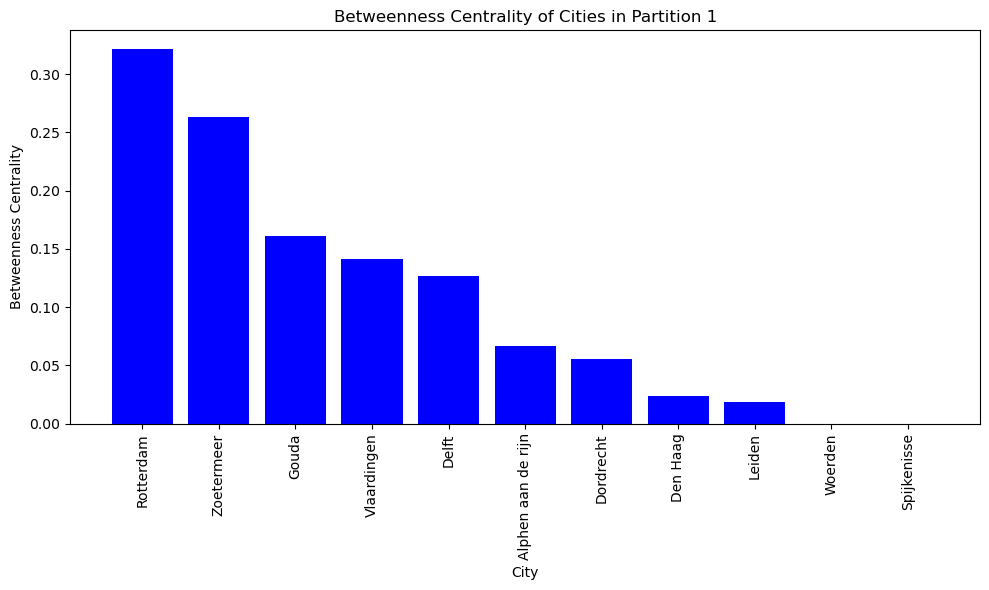

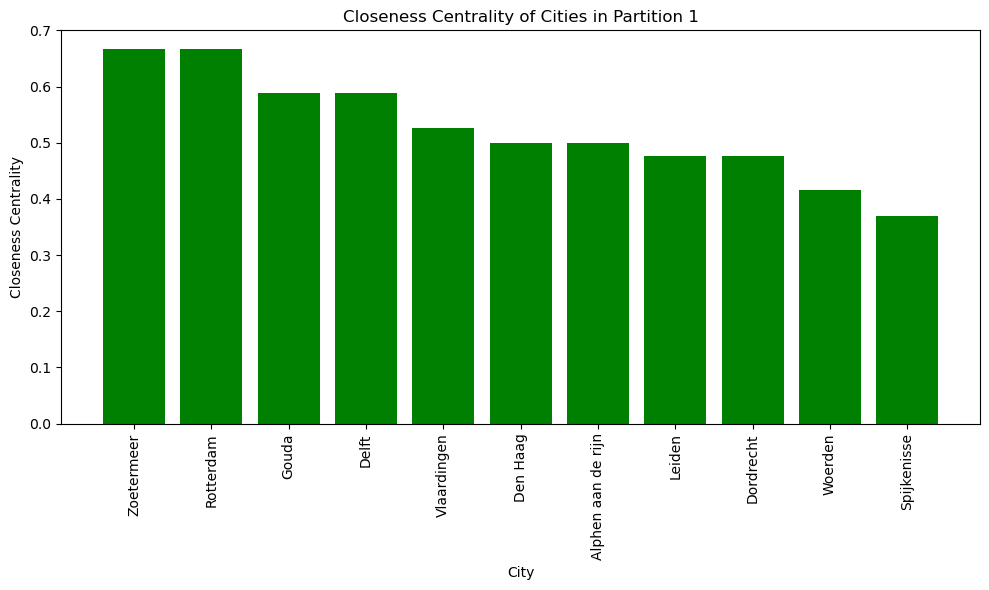

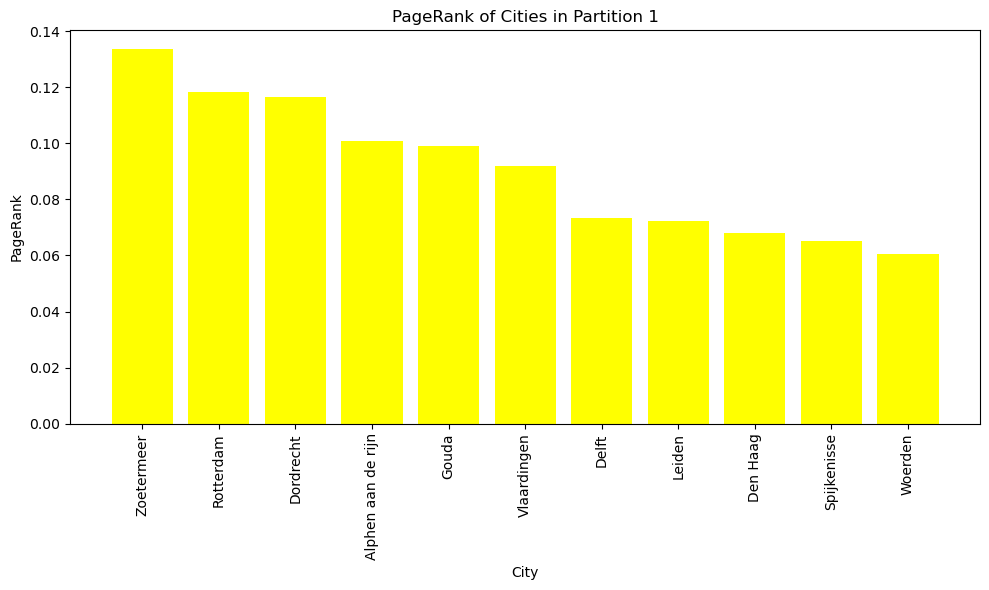

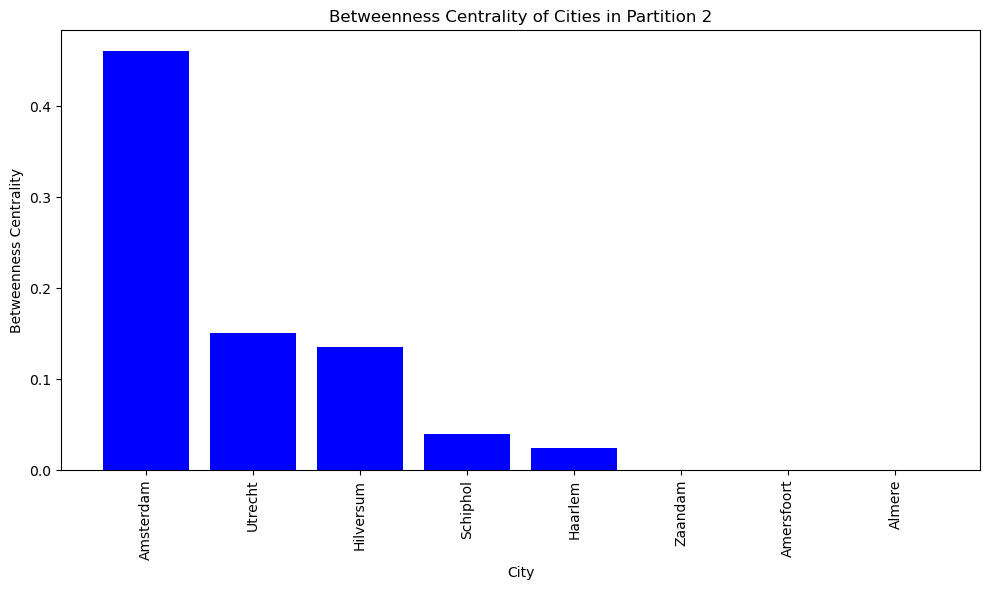

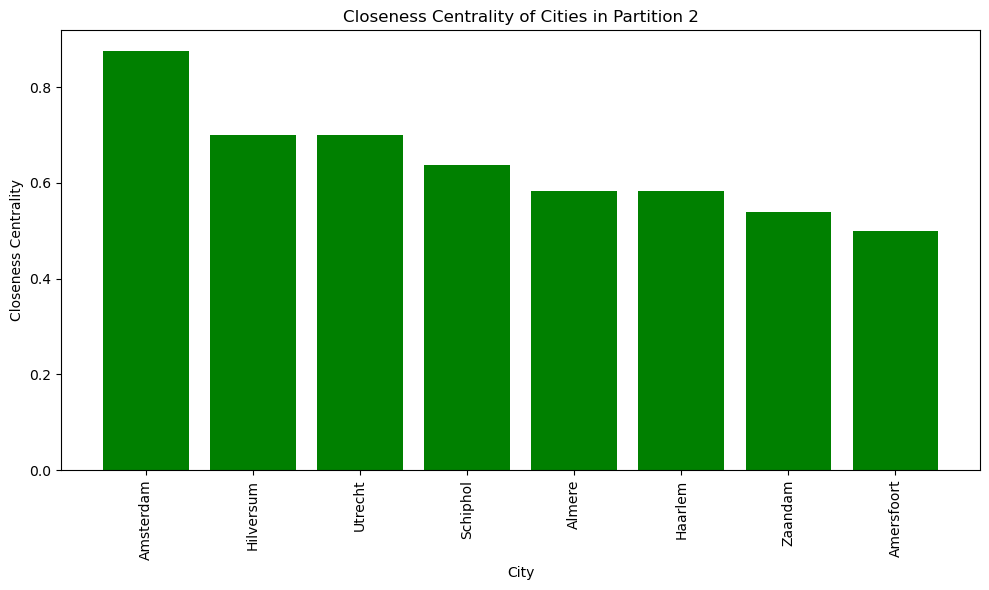

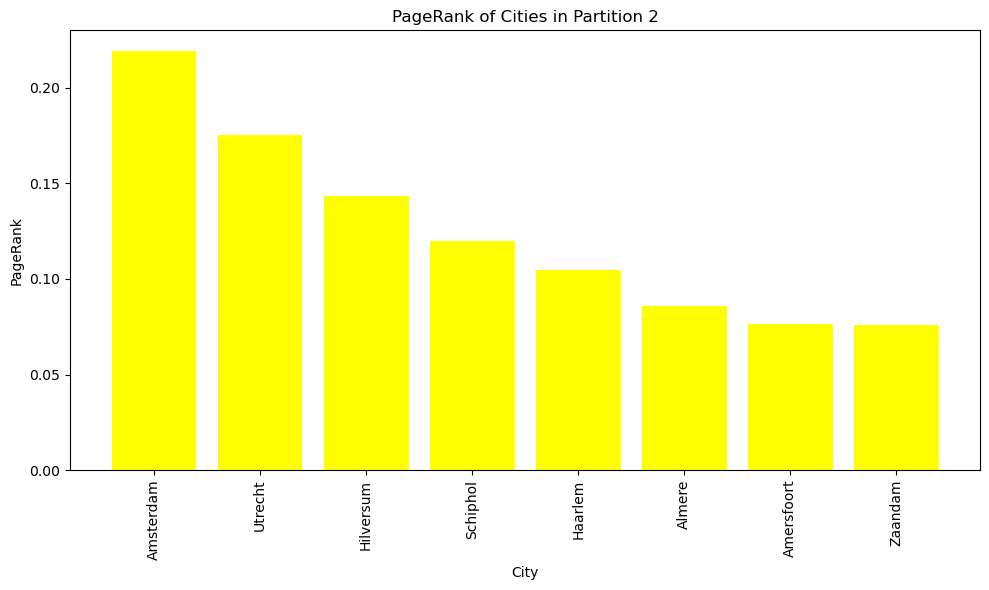

In [251]:
# Calculate betweenness centrality, closeness centrality, and PageRank for each partition
betweenness_centrality_partition_1 = nx.betweenness_centrality(Randstad_Graph.subgraph(partition_1))
closeness_centrality_partition_1 = nx.closeness_centrality(Randstad_Graph.subgraph(partition_1))
page_rank_partition_1 = nx.pagerank(Randstad_Graph.subgraph(partition_1))

betweenness_centrality_partition_2 = nx.betweenness_centrality(Randstad_Graph.subgraph(partition_2))
closeness_centrality_partition_2 = nx.closeness_centrality(Randstad_Graph.subgraph(partition_2))
page_rank_partition_2 = nx.pagerank(Randstad_Graph.subgraph(partition_2))

# Sort the measures for each partition in descending order
B_sorted_partition_1 = dict(sorted(betweenness_centrality_partition_1.items(), key=lambda item: item[1], reverse=True))
C_sorted_partition_1 = dict(sorted(closeness_centrality_partition_1.items(), key=lambda item: item[1], reverse=True))
pagerank_sorted_partition_1 = dict(sorted(page_rank_partition_1.items(), key=lambda item: item[1], reverse=True))

B_sorted_partition_2 = dict(sorted(betweenness_centrality_partition_2.items(), key=lambda item: item[1], reverse=True))
C_sorted_partition_2 = dict(sorted(closeness_centrality_partition_2.items(), key=lambda item: item[1], reverse=True))
pagerank_sorted_partition_2 = dict(sorted(page_rank_partition_2.items(), key=lambda item: item[1], reverse=True))

def print_sorted_measures(sorted_dict, partition_name):
    print(f"Sorted measures for {partition_name}:")
    for node, measure in sorted_dict.items():
        print(f"Node: {node}, Measure: {measure}")

print_sorted_measures(B_sorted_partition_1, "Partition 1 Betweenness Centrality")
print_sorted_measures(C_sorted_partition_1, "Partition 1 Closeness Centrality")
print_sorted_measures(pagerank_sorted_partition_1, "Partition 1 PageRank")

print_sorted_measures(B_sorted_partition_2, "Partition 2 Betweenness Centrality")
print_sorted_measures(C_sorted_partition_2, "Partition 2 Closeness Centrality")
print_sorted_measures(pagerank_sorted_partition_2, "Partition 2 PageRank")
# Plot the measures for each partition

# Betweenness Centrality Partition 1 (Blue)
plt.figure(figsize=(10, 6))
plt.bar(list(B_sorted_partition_1.keys()), list(B_sorted_partition_1.values()), color='blue')
plt.xlabel('City')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Cities in Partition 1')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Closeness Centrality Partition 1 (Green)
plt.figure(figsize=(10, 6))
plt.bar(list(C_sorted_partition_1.keys()), list(C_sorted_partition_1.values()), color='green')
plt.xlabel('City')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality of Cities in Partition 1')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# PageRank Partition 1 (Yellow)
plt.figure(figsize=(10, 6))
plt.bar(list(pagerank_sorted_partition_1.keys()), list(pagerank_sorted_partition_1.values()), color='yellow')
plt.xlabel('City')
plt.ylabel('PageRank')
plt.title('PageRank of Cities in Partition 1')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Betweenness Centrality Partition 2 (Blue)
plt.figure(figsize=(10, 6))
plt.bar(list(B_sorted_partition_2.keys()), list(B_sorted_partition_2.values()), color='blue')
plt.xlabel('City')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Cities in Partition 2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Closeness Centrality Partition 2 (Green)
plt.figure(figsize=(10, 6))
plt.bar(list(C_sorted_partition_2.keys()), list(C_sorted_partition_2.values()), color='green')
plt.xlabel('City')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality of Cities in Partition 2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# PageRank Partition 2 (Yellow)
plt.figure(figsize=(10, 6))
plt.bar(list(pagerank_sorted_partition_2.keys()), list(pagerank_sorted_partition_2.values()), color='yellow')
plt.xlabel('City')
plt.ylabel('PageRank')
plt.title('PageRank of Cities in Partition 2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Sorted weighted measures for Partition 1 Weighted Betweenness Centrality:
Node: Rotterdam, Weighted Measure: 0.06129175288205735
Node: Dordrecht, Weighted Measure: 0.016140099814353437
Node: Den Haag, Weighted Measure: 0.008825922328730489
Node: Leiden, Weighted Measure: 0.008415091329664193
Node: Zoetermeer, Weighted Measure: 0.007741086384302464
Node: Alphen aan de rijn, Weighted Measure: 0.004615670947329239
Node: Delft, Weighted Measure: 0.0022210023037690786
Node: Vlaardingen, Weighted Measure: 0.0012545219092662192
Node: Gouda, Weighted Measure: 0.000949909835514329
Node: Spijkenisse, Weighted Measure: 0.0
Node: Woerden, Weighted Measure: 0.0
Sorted weighted measures for Partition 1 Weighted Closeness Centrality:
Node: Rotterdam, Weighted Measure: 0.3097438411570046
Node: Den Haag, Weighted Measure: 0.2255532984069283
Node: Leiden, Weighted Measure: 0.038442211055276385
Node: Dordrecht, Weighted Measure: 0.037609098122189905
Node: Zoetermeer, Weighted Measure: 0.0366116295764537


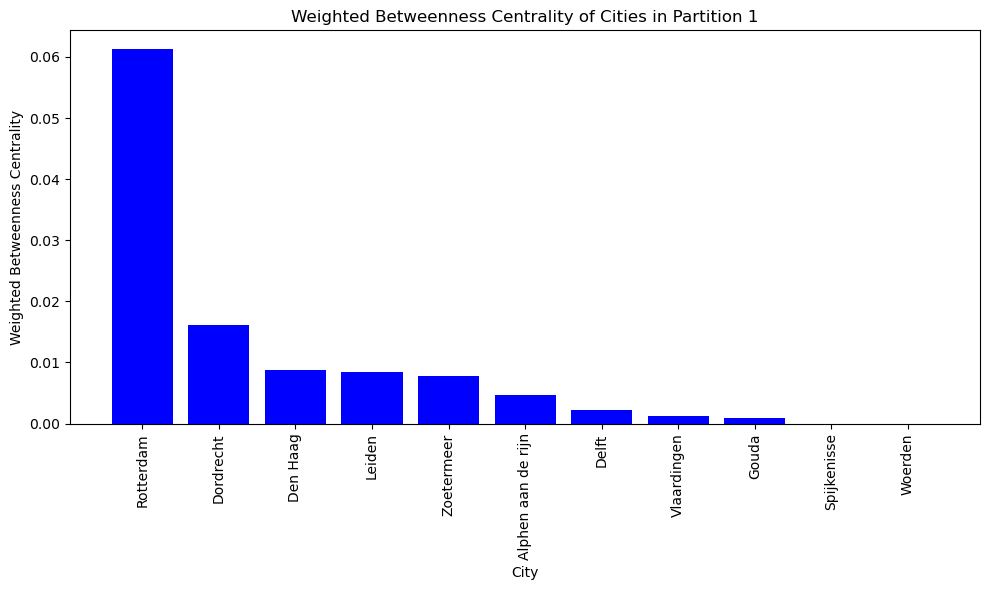

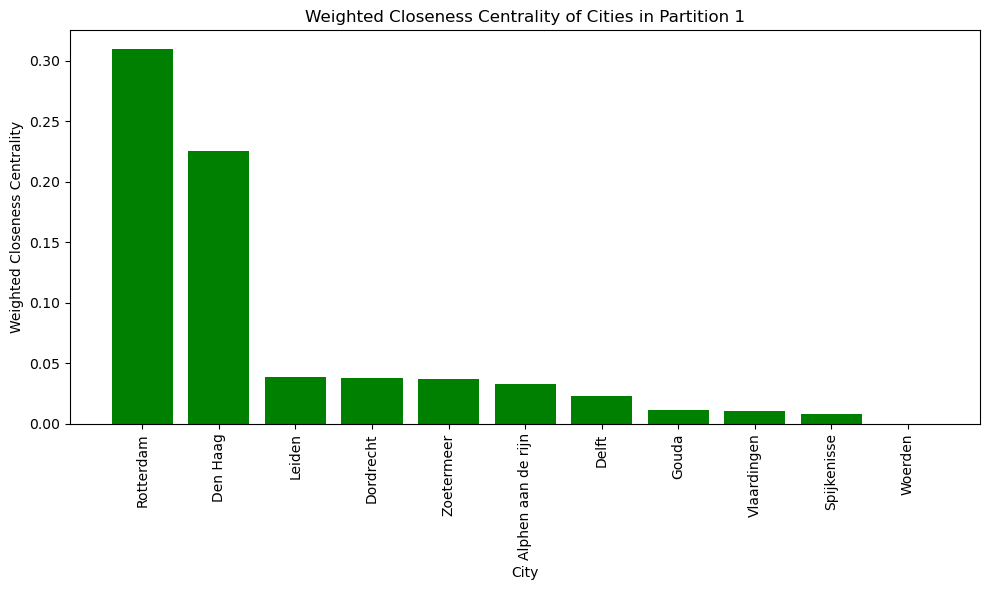

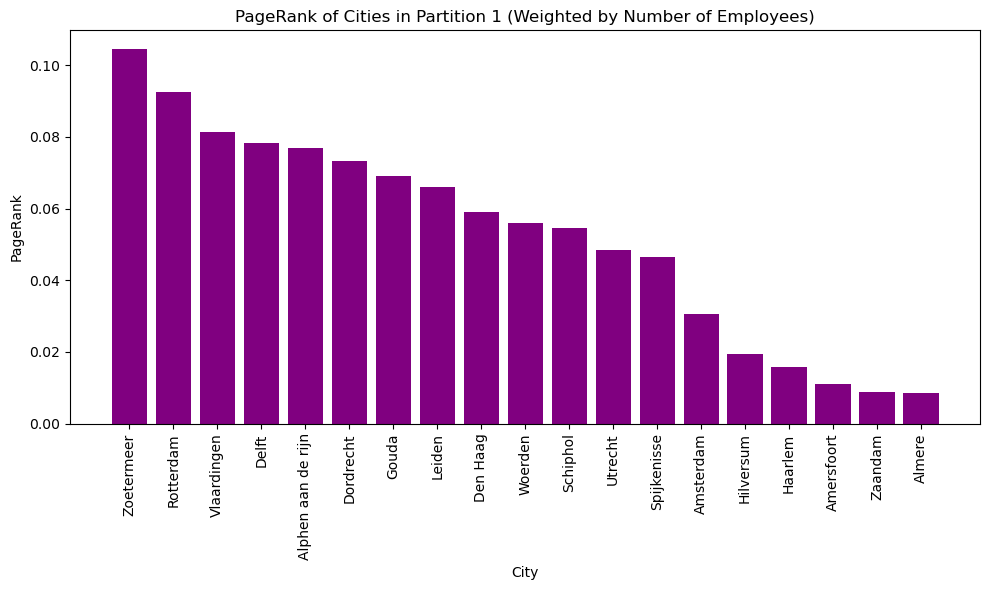

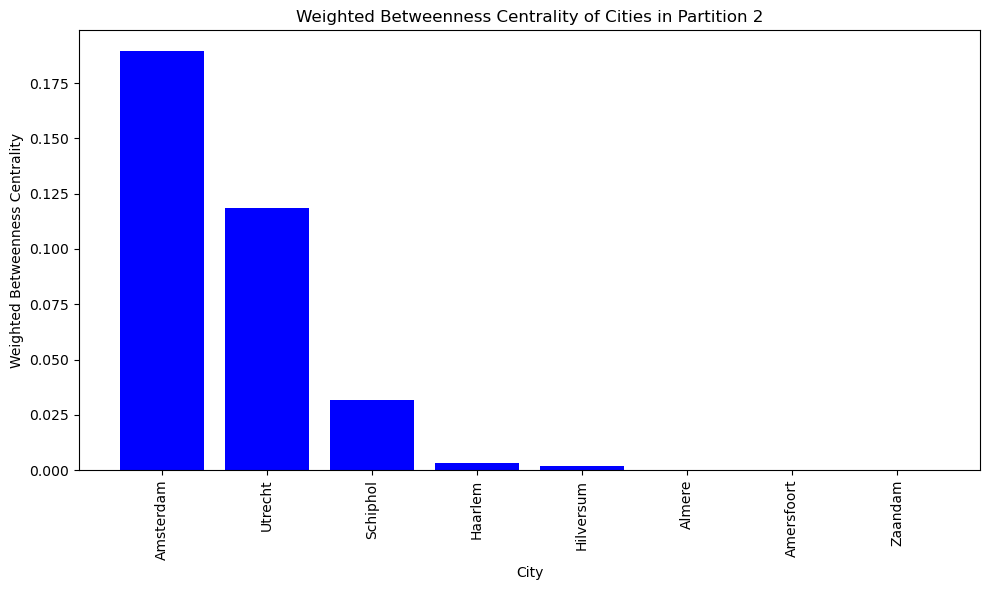

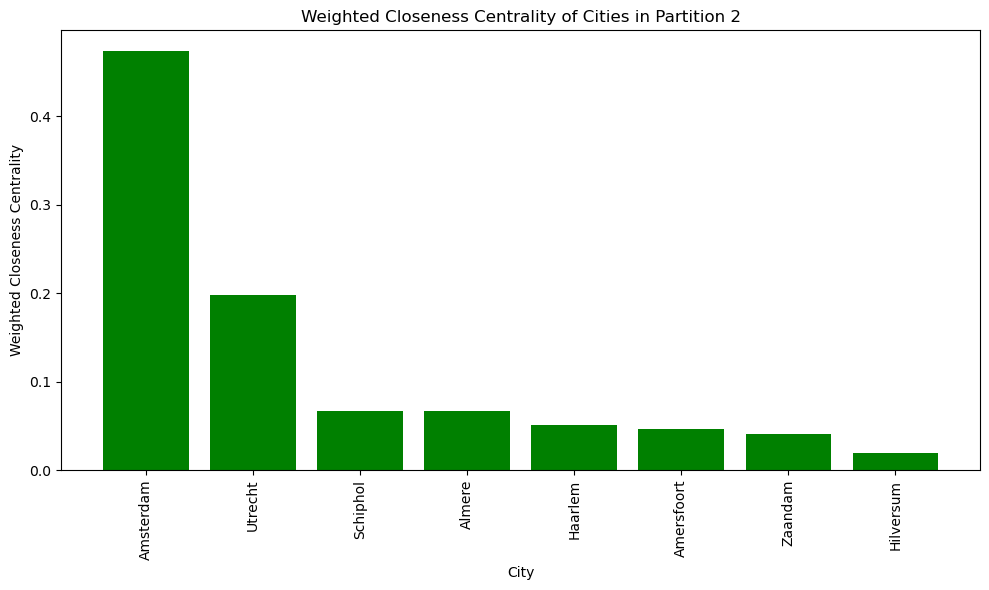

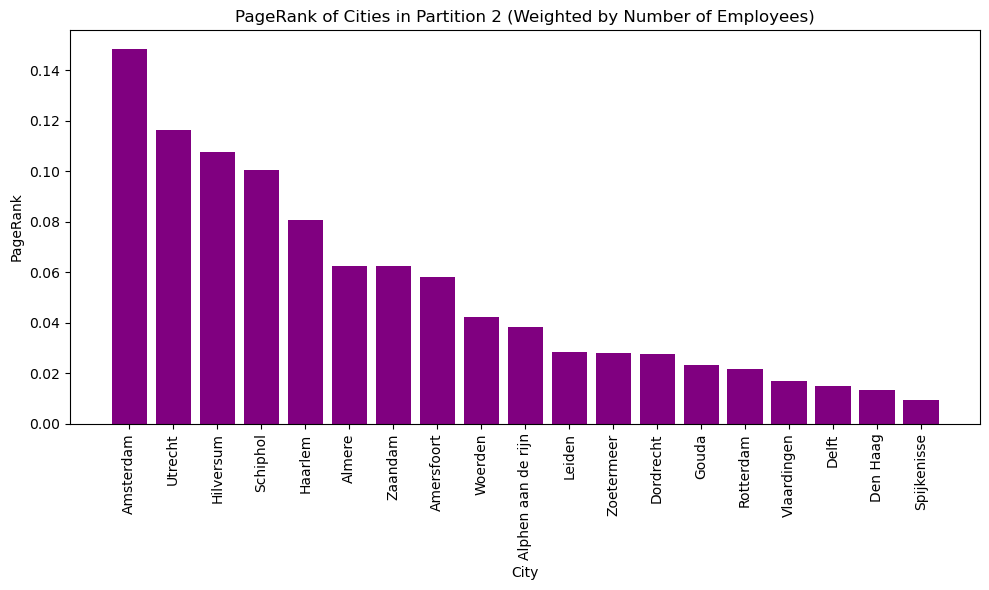

In [252]:
# Calculate weighted betweenness centrality for each partition
B_weighted_partition_1 = {city: nx.betweenness_centrality(Randstad_Graph)[city] * Randstad_Graph.nodes[city]['employee_weight_factor'] for city in partition_1}
B_weighted_partition_2 = {city: nx.betweenness_centrality(Randstad_Graph)[city] * Randstad_Graph.nodes[city]['employee_weight_factor'] for city in partition_2}

# Calculate weighted closeness centrality for each partition
C_weighted_partition_1 = {city: nx.closeness_centrality(Randstad_Graph)[city] * Randstad_Graph.nodes[city]['employee_weight_factor'] for city in partition_1}
C_weighted_partition_2 = {city: nx.closeness_centrality(Randstad_Graph)[city] * Randstad_Graph.nodes[city]['employee_weight_factor'] for city in partition_2}

# Calculate PageRank with weight for each partition
pagerank_partition_1 = nx.pagerank(Randstad_Graph, weight='employee_weight_factor', personalization={city: 1/len(partition_1) for city in partition_1})
pagerank_partition_2 = nx.pagerank(Randstad_Graph, weight='employee_weight_factor', personalization={city: 1/len(partition_2) for city in partition_2})

# Sort the weighted measures for each partition
B_sorted_partition_1 = dict(sorted(B_weighted_partition_1.items(), key=lambda item: item[1], reverse=True))
C_sorted_partition_1 = dict(sorted(C_weighted_partition_1.items(), key=lambda item: item[1], reverse=True))
pagerank_sorted_partition_1 = dict(sorted(pagerank_partition_1.items(), key=lambda item: item[1], reverse=True))

B_sorted_partition_2 = dict(sorted(B_weighted_partition_2.items(), key=lambda item: item[1], reverse=True))
C_sorted_partition_2 = dict(sorted(C_weighted_partition_2.items(), key=lambda item: item[1], reverse=True))
pagerank_sorted_partition_2 = dict(sorted(pagerank_partition_2.items(), key=lambda item: item[1], reverse=True))

def print_sorted_weighted_measures(sorted_dict, partition_name):
    print(f"Sorted weighted measures for {partition_name}:")
    for node, measure in sorted_dict.items():
        print(f"Node: {node}, Weighted Measure: {measure}")

print_sorted_weighted_measures(B_sorted_partition_1, "Partition 1 Weighted Betweenness Centrality")
print_sorted_weighted_measures(C_sorted_partition_1, "Partition 1 Weighted Closeness Centrality")
print_sorted_weighted_measures(pagerank_sorted_partition_1, "Partition 1 Weighted PageRank")

print_sorted_weighted_measures(B_sorted_partition_2, "Partition 2 Weighted Betweenness Centrality")
print_sorted_weighted_measures(C_sorted_partition_2, "Partition 2 Weighted Closeness Centrality")
print_sorted_weighted_measures(pagerank_sorted_partition_2, "Partition 2 Weighted PageRank")
 
# Plot the weighted measures for each partition
# Weighted Betweenness Centrality Partition 1 (Blue)
plt.figure(figsize=(10, 6))
plt.bar(list(B_sorted_partition_1.keys()), list(B_sorted_partition_1.values()), color='blue')
plt.xlabel('City')
plt.ylabel('Weighted Betweenness Centrality')
plt.title('Weighted Betweenness Centrality of Cities in Partition 1')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Weighted Closeness Centrality Partition 1 (Green)
plt.figure(figsize=(10, 6))
plt.bar(list(C_sorted_partition_1.keys()), list(C_sorted_partition_1.values()), color='green')
plt.xlabel('City')
plt.ylabel('Weighted Closeness Centrality')
plt.title('Weighted Closeness Centrality of Cities in Partition 1')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Weighted PageRank Partition 1 (Yellow)
plt.figure(figsize=(10, 6))
plt.bar(list(pagerank_sorted_partition_1.keys()), list(pagerank_sorted_partition_1.values()), color='purple')
plt.xlabel('City')
plt.ylabel('PageRank')
plt.title('PageRank of Cities in Partition 1 (Weighted by Number of Employees)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Weighted Betweenness Centrality Partition 2 (Blue)
plt.figure(figsize=(10, 6))
plt.bar(list(B_sorted_partition_2.keys()), list(B_sorted_partition_2.values()), color='blue')
plt.xlabel('City')
plt.ylabel('Weighted Betweenness Centrality')
plt.title('Weighted Betweenness Centrality of Cities in Partition 2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Weighted Closeness Centrality Partition 2 (Green)
plt.figure(figsize=(10, 6))
plt.bar(list(C_sorted_partition_2.keys()), list(C_sorted_partition_2.values()), color='green')
plt.xlabel('City')
plt.ylabel('Weighted Closeness Centrality')
plt.title('Weighted Closeness Centrality of Cities in Partition 2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Weighted PageRank Partition 2 (Yellow)
plt.figure(figsize=(10, 6))
plt.bar(list(pagerank_sorted_partition_2.keys()), list(pagerank_sorted_partition_2.values()), color='purple')
plt.xlabel('City')
plt.ylabel('PageRank')
plt.title('PageRank of Cities in Partition 2 (Weighted by Number of Employees)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [253]:
#the next sections is about manually calculating which city is the best center hub for each partition.  startign with partition 2, the northerner section of the randstad. 
#first we need to calculate the shortest paths to each city from each city 
# Define source and destination cities
source_cities = ['Amsterdam', 'Haarlem', 'Schiphol', 'Utrecht', 'Hilversum', 'Almere', 'Amersfoort', 'Zaandam']
destination_cities = ['Amsterdam', 'Haarlem', 'Schiphol', 'Utrecht', 'Hilversum', 'Almere', 'Amersfoort', 'Zaandam']

# make a dataframe
df_shortest_paths = pd.DataFrame(columns=['Source', 'Destination', 'Shortest Path Length', 'Population'])

# calculate shortest path lengths for all pairs of source and destination cities
for source_city in source_cities:
    source_population = populations[source_city]  
    for destination_city in destination_cities:
        shortest_path_length = nx.shortest_path_length(Randstad_Graph, source=source_city, target=destination_city, weight='weight')
        df_shortest_paths = df_shortest_paths.append({'Source': source_city, 'Destination': destination_city, 'Shortest Path Length': shortest_path_length, 'Population': source_population}, ignore_index=True)

print(df_shortest_paths)

       Source Destination Shortest Path Length Population
0   Amsterdam   Amsterdam                    0       1056
1   Amsterdam     Haarlem                 20.0       1056
2   Amsterdam    Schiphol                 19.2       1056
3   Amsterdam     Utrecht                 40.0       1056
4   Amsterdam   Hilversum                 30.5       1056
..        ...         ...                  ...        ...
59    Zaandam     Utrecht                 59.9        184
60    Zaandam   Hilversum                 50.4        184
61    Zaandam      Almere                 49.8        184
62    Zaandam  Amersfoort                 74.0        184
63    Zaandam     Zaandam                    0        184

[64 rows x 4 columns]


/var/folders/92/676dh04j60l8c20_6fsl51800000gn/T/ipykernel_23759/1333773858.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_shortest_paths = df_shortest_paths.append({'Source': source_city, 'Destination': destination_city, 'Shortest Path Length': shortest_path_length, 'Population': source_population}, ignore_index=True)
/var/folders/92/676dh04j60l8c20_6fsl51800000gn/T/ipykernel_23759/1333773858.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_shortest_paths = df_shortest_paths.append({'Source': source_city, 'Destination': destination_city, 'Shortest Path Length': shortest_path_length, 'Population': source_population}, ignore_index=True)
/var/folders/92/676dh04j60l8c20_6fsl51800000gn/T/ipykernel_23759/1333773858.py:15: FutureWarning: The frame.append method is deprecated and will be removed from p

In [254]:
# calculate the travel cost, so how many ppl need to travel to that node, and travel that distacne 
def calculate_travel_cost(row):
    return row['Population'] * row['Shortest Path Length']

# Apply the function to each row in the DataFrame
df_shortest_paths['Travel Cost'] = df_shortest_paths.apply(lambda row: calculate_travel_cost(row), axis=1)

# Display the updated DataFrame
print(df_shortest_paths) 

       Source Destination Shortest Path Length Population  Travel Cost
0   Amsterdam   Amsterdam                    0       1056          0.0
1   Amsterdam     Haarlem                 20.0       1056      21120.0
2   Amsterdam    Schiphol                 19.2       1056      20275.2
3   Amsterdam     Utrecht                 40.0       1056      42240.0
4   Amsterdam   Hilversum                 30.5       1056      32208.0
..        ...         ...                  ...        ...          ...
59    Zaandam     Utrecht                 59.9        184      11021.6
60    Zaandam   Hilversum                 50.4        184       9273.6
61    Zaandam      Almere                 49.8        184       9163.2
62    Zaandam  Amersfoort                 74.0        184      13616.0
63    Zaandam     Zaandam                    0        184          0.0

[64 rows x 5 columns]


  Destination  Travel Cost
0      Almere      91173.8
1  Amersfoort     123386.7
2   Amsterdam      48898.4
3     Haarlem      87098.9
4   Hilversum      79980.5
5    Schiphol      80131.8
6     Utrecht      91334.4
7     Zaandam      90340.4


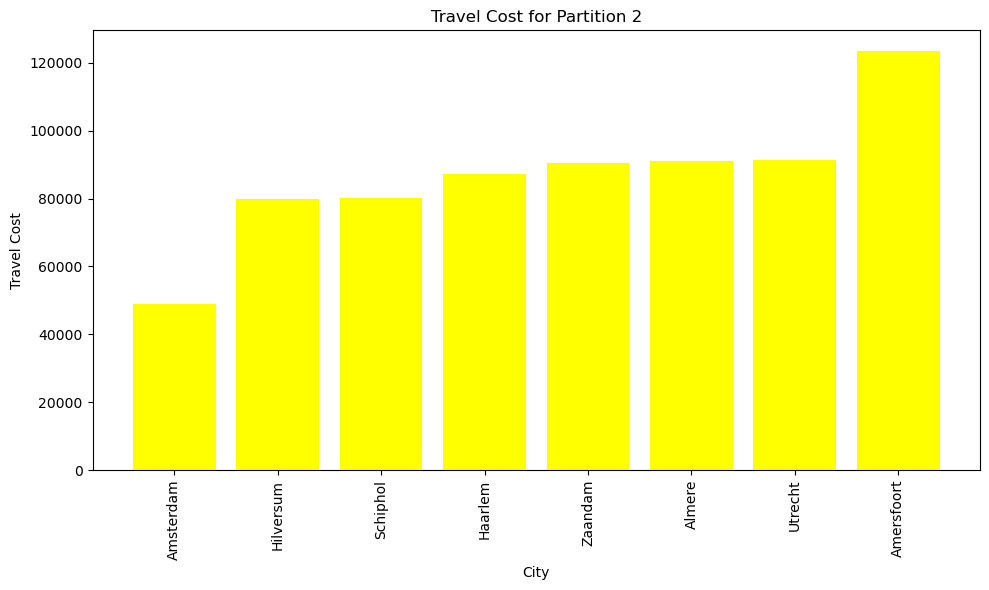

In [255]:
# group the DataFrame to find out the total travel cost to each city and plot it- lowest the better 
df_sum_travel_cost = df_shortest_paths.groupby('Destination')['Travel Cost'].sum().reset_index()

# check dataframe
print(df_sum_travel_cost)

# sort
df_sum_travel_cost_sorted = df_sum_travel_cost.sort_values(by='Travel Cost') 

# Plot 
plt.figure(figsize=(10, 6))
plt.bar(df_sum_travel_cost_sorted['Destination'], df_sum_travel_cost_sorted['Travel Cost'], color='yellow')
plt.title('Travel Cost for Partition 2')
plt.xlabel('City')
plt.ylabel('Travel Cost')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [256]:
# Do the same for partition 1 now. first define destination cities as partition 1
destination_cities = ['Leiden', 'Den Haag', 'Zoetermeer', 'Delft', 'Rotterdam', 'Spijkenisse', 'Dordrecht', 'Vlaardingen', 'Alphen aan de rijn', 'Gouda', 'Woerden']

# make DataFrame
df_shortest_paths_partition1 = pd.DataFrame(columns=['Source', 'Destination', 'Shortest Path Length', 'Population'])

# Calculate shortest path lengths for all pairs of source and destination cities
for source_city in destination_cities:
    source_population = populations[source_city]  # Get the population of the source city
    for destination_city in destination_cities:
        shortest_path_length = nx.shortest_path_length(Randstad_Graph, source=source_city, target=destination_city, weight='weight')
        # Append the results to the DataFrame
        df_shortest_paths_partition1 = df_shortest_paths_partition1.append({'Source': source_city, 'Destination': destination_city, 'Shortest Path Length': shortest_path_length, 'Population': source_population}, ignore_index=True)

# Display the DataFrame
print(df_shortest_paths_partition1)


      Source         Destination Shortest Path Length Population
0     Leiden              Leiden                    0        146
1     Leiden            Den Haag                 22.9        146
2     Leiden          Zoetermeer                 13.8        146
3     Leiden               Delft                 30.4        146
4     Leiden           Rotterdam                 32.4        146
..       ...                 ...                  ...        ...
116  Woerden           Dordrecht                 69.0         61
117  Woerden         Vlaardingen                 52.6         61
118  Woerden  Alphen aan de rijn                 24.1         61
119  Woerden               Gouda                 17.4         61
120  Woerden             Woerden                    0         61

[121 rows x 4 columns]


/var/folders/92/676dh04j60l8c20_6fsl51800000gn/T/ipykernel_23759/2358129652.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_shortest_paths_partition1 = df_shortest_paths_partition1.append({'Source': source_city, 'Destination': destination_city, 'Shortest Path Length': shortest_path_length, 'Population': source_population}, ignore_index=True)
/var/folders/92/676dh04j60l8c20_6fsl51800000gn/T/ipykernel_23759/2358129652.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_shortest_paths_partition1 = df_shortest_paths_partition1.append({'Source': source_city, 'Destination': destination_city, 'Shortest Path Length': shortest_path_length, 'Population': source_population}, ignore_index=True)
/var/folders/92/676dh04j60l8c20_6fsl51800000gn/T/ipykernel_23759/2358129652.py:13: FutureWarning: The frame.append met

In [257]:
# Define a function to calculate the travel cost
def calculate_travel_cost(row):
    return row['Population'] * row['Shortest Path Length']

# Apply the function to each row in the DataFrame
df_shortest_paths_partition1['Travel Cost'] = df_shortest_paths_partition1.apply(lambda row: calculate_travel_cost(row), axis=1)

# Display the updated DataFrame
print(df_shortest_paths_partition1)

      Source         Destination Shortest Path Length Population  Travel Cost
0     Leiden              Leiden                    0        146          0.0
1     Leiden            Den Haag                 22.9        146       3343.4
2     Leiden          Zoetermeer                 13.8        146       2014.8
3     Leiden               Delft                 30.4        146       4438.4
4     Leiden           Rotterdam                 32.4        146       4730.4
..       ...                 ...                  ...        ...          ...
116  Woerden           Dordrecht                 69.0         61       4209.0
117  Woerden         Vlaardingen                 52.6         61       3208.6
118  Woerden  Alphen aan de rijn                 24.1         61       1470.1
119  Woerden               Gouda                 17.4         61       1061.4
120  Woerden             Woerden                    0         61          0.0

[121 rows x 5 columns]


           Destination  Travel Cost
0   Alphen aan de rijn      83739.4
1                Delft      43700.6
2             Den Haag      45688.1
3            Dordrecht      97619.6
4                Gouda      69089.6
5               Leiden      69217.5
6            Rotterdam      39733.7
7          Spijkenisse      84889.4
8          Vlaardingen      54199.0
9              Woerden     105888.6
10          Zoetermeer      48247.4


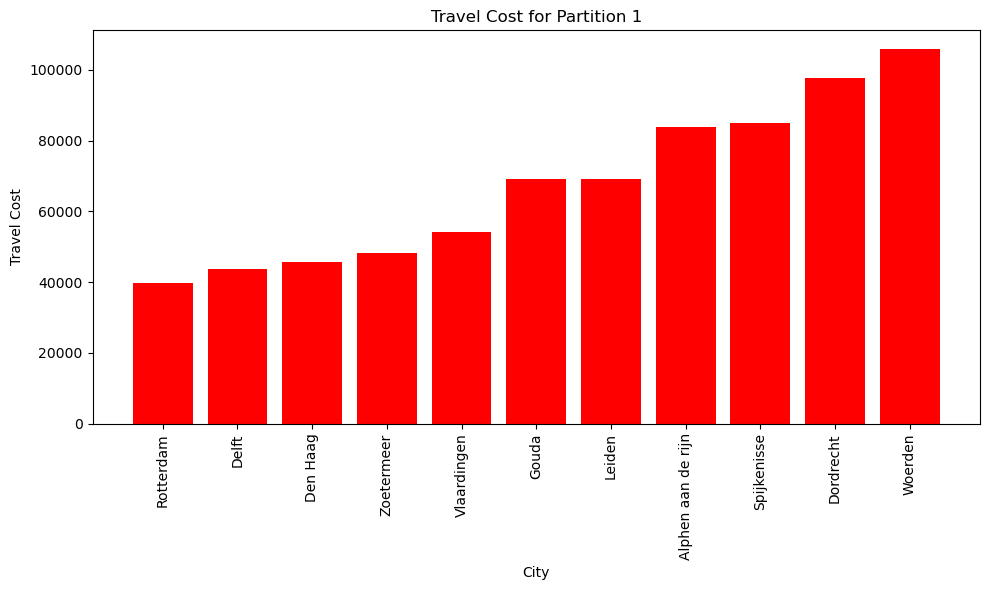

In [258]:
#group the DataFrame to find out the total travel cost to each city and plot it- lowest the better 
df_sum_travel_cost_partition1 = df_shortest_paths_partition1.groupby('Destination')['Travel Cost'].sum().reset_index()

# check dataframe
print(df_sum_travel_cost_partition1)

# Sort 
df_sum_travel_cost_partition1_sorted = df_sum_travel_cost_partition1.sort_values(by='Travel Cost')

# Plot 
plt.figure(figsize=(10, 6))
plt.bar(df_sum_travel_cost_partition1_sorted['Destination'], df_sum_travel_cost_partition1_sorted['Travel Cost'], color='red')
plt.title('Travel Cost for Partition 1')
plt.xlabel('City')
plt.ylabel('Travel Cost')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

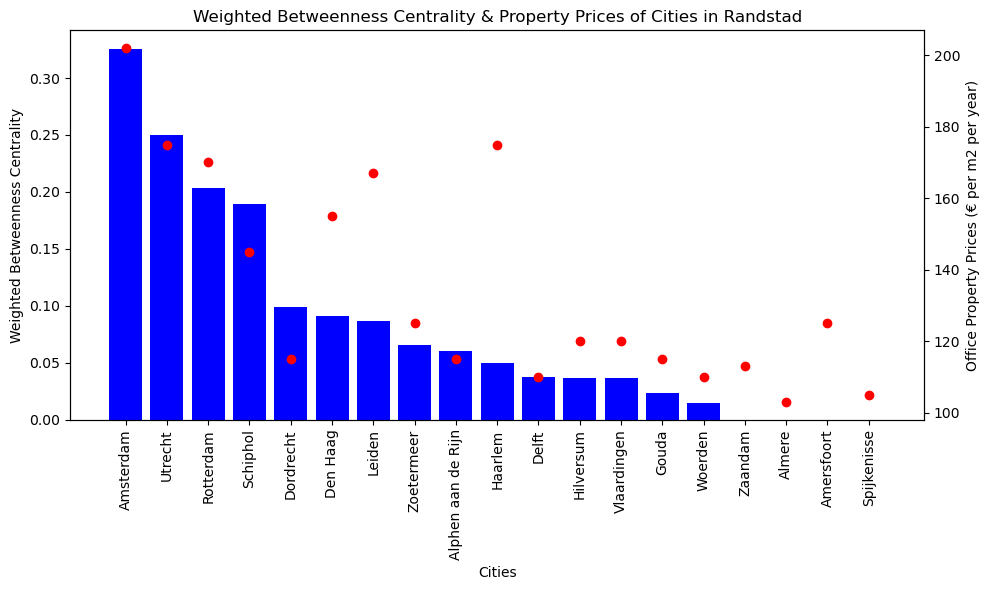

In [259]:
import matplotlib.pyplot as plt

# Plot the values in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_sorted_betweenness['Node'], df_sorted_betweenness['Betweenness Centrality'], color='blue')
plt.xticks(rotation=90)
plt.title("Weighted Betweenness Centrality & Property Prices of Cities in Randstad")
plt.xlabel("Cities")
plt.ylabel("Weighted Betweenness Centrality")
plt.xticks(rotation=90)

# Added code to plot the office prices
cities = ['Amsterdam', 'Utrecht', 'Rotterdam', 'Schiphol', 'Dordrecht', 'Den Haag', 'Leiden', 'Zoetermeer', 'Alphen aan de Rijn', 'Haarlem', 'Delft', 'Hilversum', 'Vlaardingen', 'Gouda', 'Woerden', 'Zaandam', 'Almere', 'Amersfoort', 'Spijkenisse']  
prices = [202, 175, 170, 145, 115, 155, 167, 125, 115, 175, 110, 120, 120, 115, 110, 113, 103, 125, 105]
office_prices = dict(zip(cities, prices))

plt.twinx()  
plt.plot(office_prices.keys(), office_prices.values(), color='red', marker='o', label='Office Property Prices', linestyle='')
plt.ylabel('Office Property Prices (€ per m2 per year)')

plt.tight_layout()

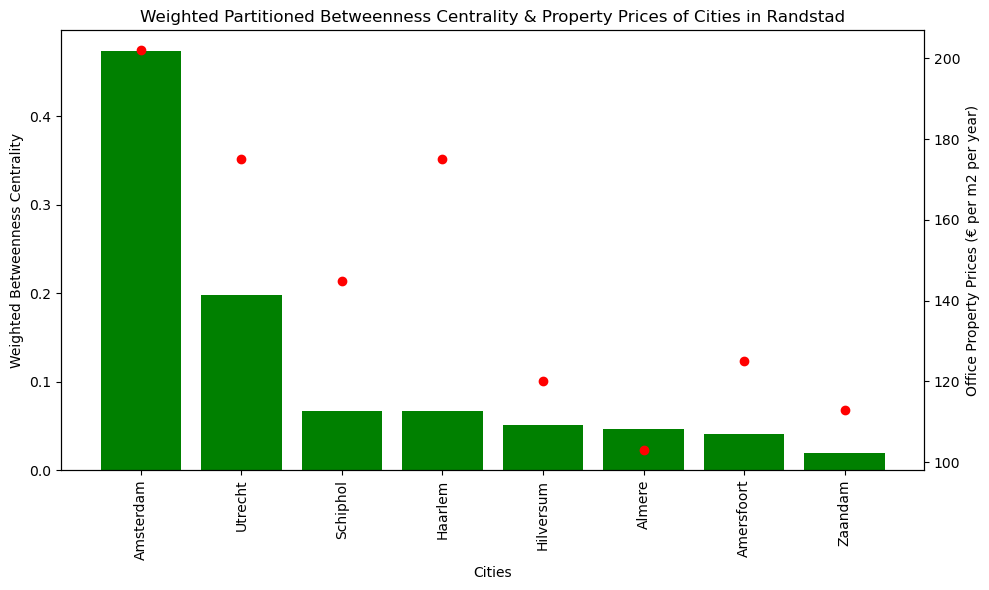

In [260]:
import matplotlib.pyplot as plt

# Plot the values in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(list(C_sorted_partition_2.keys()), list(C_sorted_partition_2.values()), color='green')
plt.xticks(rotation=90)
plt.title("Weighted Partitioned Betweenness Centrality & Property Prices of Cities in Randstad")
plt.xlabel("Cities")
plt.ylabel("Weighted Betweenness Centrality")
plt.xticks(rotation=90)

# Added code to plot the office prices
cities = ['Amsterdam', 'Utrecht', 'Schiphol', 'Haarlem', 'Hilversum', 'Almere', 'Amersfoort', 'Zaandam']  
prices = [202, 175, 145, 175, 120, 103, 125, 113]
office_prices = dict(zip(cities, prices))

plt.twinx()  
plt.plot(office_prices.keys(), office_prices.values(), color='red', marker='o', label='Office Property Prices', linestyle='')
plt.ylabel('Office Property Prices (€ per m2 per year)')

plt.tight_layout()

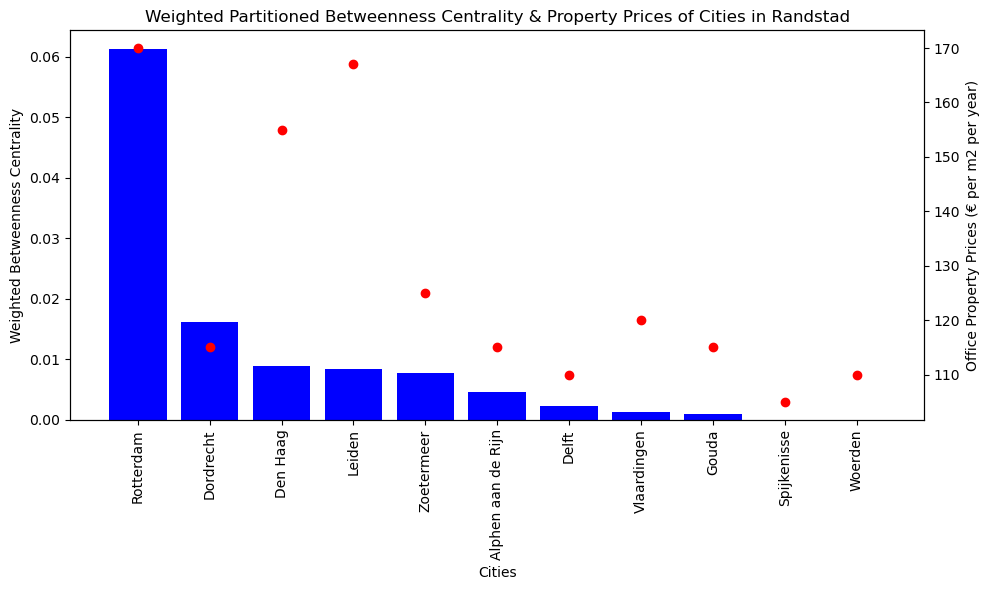

In [261]:
import matplotlib.pyplot as plt

# Plot the values in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(list(B_sorted_partition_1.keys()), list(B_sorted_partition_1.values()), color='blue')
plt.xticks(rotation=90)
plt.title("Weighted Partitioned Betweenness Centrality & Property Prices of Cities in Randstad")
plt.xlabel("Cities")
plt.ylabel("Weighted Betweenness Centrality")
plt.xticks(rotation=90)

# Added code to plot the office prices
cities = ['Rotterdam', 'Dordrecht', 'Den Haag', 'Leiden', 'Zoetermeer', 'Alphen aan de Rijn', 'Delft', 'Vlaardingen', 'Gouda', 'Spijkenisse', 'Woerden']  
prices = [170, 115, 155, 167, 125, 115, 110, 120, 115, 105, 110]
office_prices = dict(zip(cities, prices))

plt.twinx()  
plt.plot(office_prices.keys(), office_prices.values(), color='red', marker='o', label='Office Property Prices', linestyle='')
plt.ylabel('Office Property Prices (€ per m2 per year)')

plt.tight_layout()

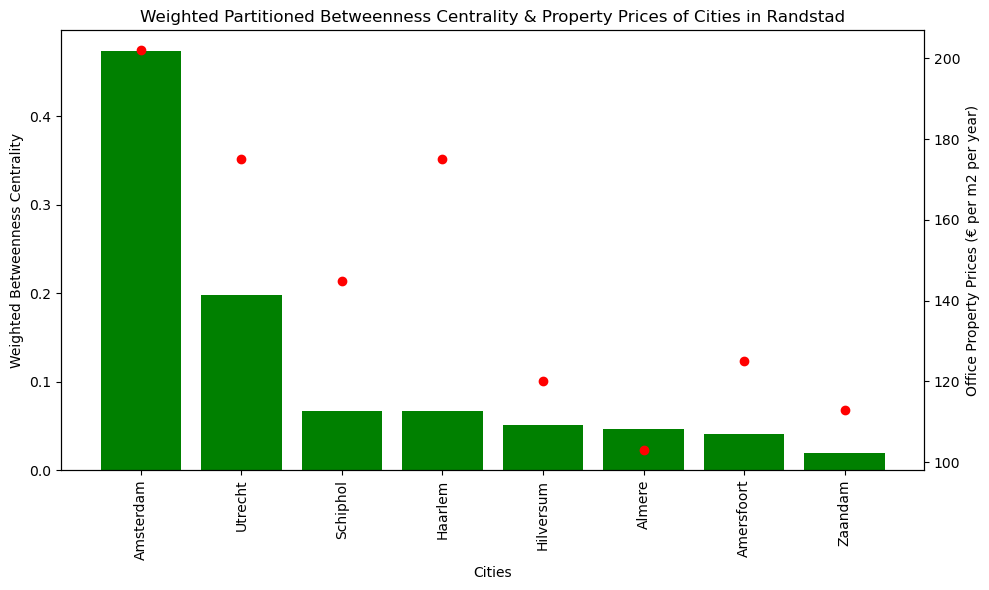

In [262]:
import matplotlib.pyplot as plt

# Plot the values in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(list(C_sorted_partition_2.keys()), list(C_sorted_partition_2.values()), color='green')
plt.xticks(rotation=90)
plt.title("Weighted Partitioned Betweenness Centrality & Property Prices of Cities in Randstad")
plt.xlabel("Cities")
plt.ylabel("Weighted Betweenness Centrality")
plt.xticks(rotation=90)

# Added code to plot the office prices
cities = ['Amsterdam', 'Utrecht', 'Schiphol', 'Haarlem', 'Hilversum', 'Almere', 'Amersfoort', 'Zaandam']  
prices = [202, 175, 145, 175, 120, 103, 125, 113]
office_prices = dict(zip(cities, prices))

plt.twinx()  
plt.plot(office_prices.keys(), office_prices.values(), color='red', marker='o', label='Office Property Prices', linestyle='')
plt.ylabel('Office Property Prices (€ per m2 per year)')

plt.tight_layout()

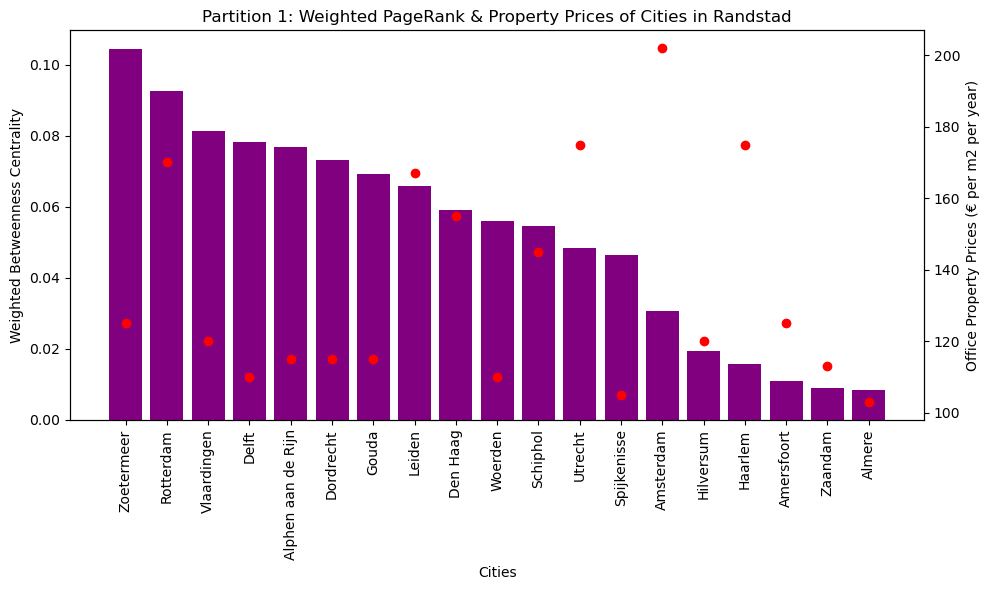

In [263]:
import matplotlib.pyplot as plt

# Plot the values in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(list(pagerank_sorted_partition_1.keys()), list(pagerank_sorted_partition_1.values()), color='purple')
plt.xticks(rotation=90)
plt.title("Partition 1: Weighted PageRank & Property Prices of Cities in Randstad")
plt.xlabel("Cities")
plt.ylabel("Weighted Betweenness Centrality")
plt.xticks(rotation=90)

# Added code to plot the office prices
cities = ['Zoetermeer', 'Rotterdam', 'Vlaardingen', 'Delft', 'Alphen aan de Rijn', 'Dordrecht', 'Gouda', 'Leiden','Den Haag','Woerden','Schiphol','Utrecht','Spijkenisse','Amsterdam','Hilversum','Haarlem','Amersfoort','Zaandam','Almere']  
prices = [125,170,120,110,115,115,115,167,155,110,145,175,105,202,120,175,125,113,103]
office_prices = dict(zip(cities, prices))

plt.twinx()  
plt.plot(office_prices.keys(), office_prices.values(), color='red', marker='o', label='Office Property Prices', linestyle='')
plt.ylabel('Office Property Prices (€ per m2 per year)')

plt.tight_layout()

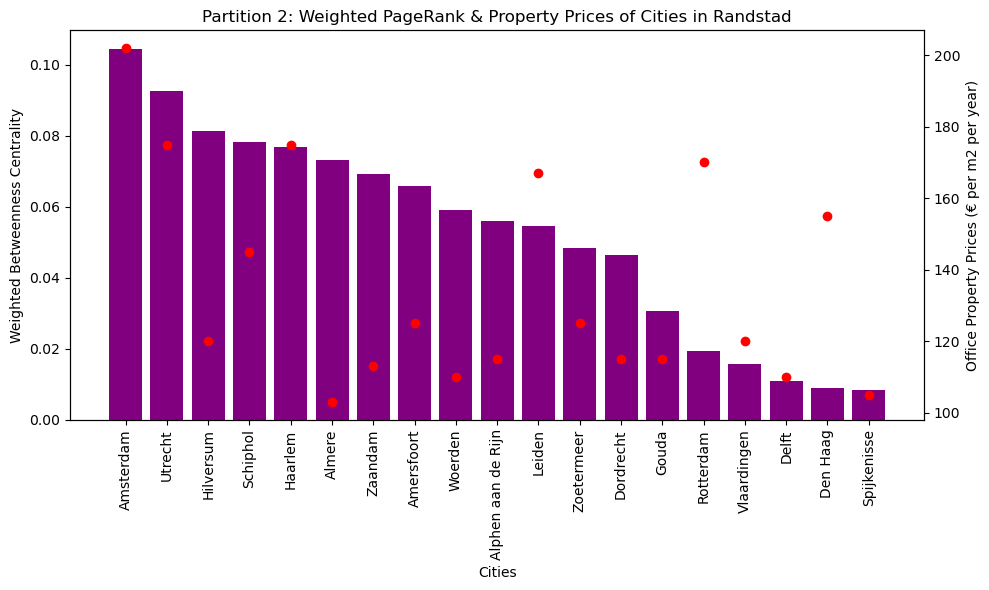

In [264]:
import matplotlib.pyplot as plt

# Plot the values in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(list(pagerank_sorted_partition_1.keys()), list(pagerank_sorted_partition_1.values()), color='purple')
plt.xticks(rotation=90)
plt.title("Partition 2: Weighted PageRank & Property Prices of Cities in Randstad")
plt.xlabel("Cities")
plt.ylabel("Weighted Betweenness Centrality")
plt.xticks(rotation=90)

# Added code to plot the office prices
cities = ['Amsterdam', 'Utrecht', 'Hilversum', 'Schiphol', 'Haarlem', 'Almere', 'Zaandam', 'Amersfoort','Woerden','Alphen aan de Rijn','Leiden','Zoetermeer','Dordrecht','Gouda','Rotterdam','Vlaardingen','Delft','Den Haag','Spijkenisse']  
prices = [202, 175, 120, 145, 175, 103, 113, 125,110,115,167,125,115,115,170,120,110,155,105]
office_prices = dict(zip(cities, prices))

plt.twinx()  
plt.plot(office_prices.keys(), office_prices.values(), color='red', marker='o', label='Office Property Prices', linestyle='')
plt.ylabel('Office Property Prices (€ per m2 per year)')

plt.tight_layout()